In [1]:
# Importación de bibliotecas generales
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

# Codificar la columna clasificada
from sklearn.preprocessing import LabelEncoder

# Modelos de machine learning y evaluación
# !pip install catboost
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from catboost import CatBoostClassifier


# Configuraciones generales
# plt.style.use('dark_background')
%matplotlib inline

# **Diccionario de Datos del Dataset**

| **Nombre de la Variable**    | **Tipo de Dato** | **Valores**                                                             | **Descripción**                                                                                       |
|-------------------------------|------------------|--------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------|
| `DR_NO`                      | Numérico         | Número único                                                            | Número de identificación único asignado a cada reporte de crimen.                                    |
| `Date Rptd`                  | Fecha            | Fecha (YYYY-MM-DD)                                                      | Fecha en que se reportó el crimen a la policía.                                                     |
| `DATE OCC`                   | Fecha            | Fecha (YYYY-MM-DD)                                                      | Fecha en que ocurrió el crimen.                                                                     |
| `TIME OCC`                   | Numérico         | 0–2359                                                                  | Hora en formato militar (24 horas) en que ocurrió el crimen. Ejemplo: 1400 equivale a las 2:00 PM.  |
| `AREA`                       | Numérico         | 1–21                                                                    | Código numérico que representa una división geográfica de la ciudad (área policial).                |
| `AREA NAME`                  | Texto            | Nombre del área                                                         | Nombre del área geográfica o estación de policía donde ocurrió el crimen.                           |
| `Rpt Dist No`                | Numérico         | Código de distrito                                                      | Código numérico que representa un distrito dentro de un área. Es una subdivisión más específica.    |
| `Part 1-2`                   | Categórico       | 1 (serios), 2 (menores)                                                 | Clasificación del crimen según su gravedad.                                                         |
| `Crm Cd`                     | Numérico         | Código de crimen                                                        | Código numérico que identifica el tipo de crimen.                                                   |
| `Crm Cd Desc`                | Texto            | Descripción textual                                                     | Descripción textual del tipo de crimen, como "Battery - Simple Assault".                            |
| `Mocodes`                    | Texto            | Modos operandi                                                          | Código(s) que describe(n) cómo ocurrió el crimen o el método utilizado por el delincuente.          |
| `Vict Age`                   | Numérico         | 0–120                                                                   | Edad de la víctima en el momento del crimen.                                                        |
| `Vict Sex`                   | Categórico       | M (Masculino), F (Femenino), X (Desconocido), - (No especificado)       | Sexo de la víctima.                                                                                 |
| `Vict Descent`               | Categórico       | H, W, B, O, A, etc.                                                     | Ascendencia o etnia de la víctima (e.g., H = Hispano, W = Blanco).                                  |
| `Premis Cd`                  | Numérico         | Código de lugar                                                         | Código numérico que representa el tipo de lugar donde ocurrió el crimen.                            |
| `Premis Desc`                | Texto            | Descripción textual del lugar                                            | Ejemplos: "Residencia", "Tienda", "Parque".                                                        |
| `Status`                     | Categórico       | IC, AA, AO, JA, JO, UNK                                                 | Código que indica el estado del reporte (e.g., Investigación continua, Arresto realizado).          |
| `Status Desc`                | Texto            | Descripción textual del estado                                           | Ejemplo: "Investigation Continued" o "Arrest Made".                                                |
| `Crm Cd 1`                   | Numérico         | Código de crimen                                                        | Código del primer tipo de crimen relacionado con el incidente.                                      |
| `LOCATION`                   | Texto            | Dirección aproximada                                                    | Ubicación del crimen en formato de texto.                                                          |
| `LAT`                        | Numérico         | Coordenada de latitud                                                   | Coordenada de latitud donde ocurrió el crimen.                                                     |
| `LON`                        | Numérico         | Coordenada de longitud                                                  | Coordenada de longitud donde ocurrió el crimen.                                                    |




In [ ]:
# Rutas a los archivos CSV
archivo_csv = r'Crime_Data_from_2020_to_Present.csv'

# Cargar los archivos CSV en DataFrames de pandas
df = pd.read_csv(archivo_csv)

# Mostrar las primeras filas del DataFrame para verificar la carga
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
data = df.copy()

In [4]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [5]:
data.shape

(984045, 28)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984045 entries, 0 to 984044
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           984045 non-null  int64  
 1   Date Rptd       984045 non-null  object 
 2   DATE OCC        984045 non-null  object 
 3   TIME OCC        984045 non-null  int64  
 4   AREA            984045 non-null  int64  
 5   AREA NAME       984045 non-null  object 
 6   Rpt Dist No     984045 non-null  int64  
 7   Part 1-2        984045 non-null  int64  
 8   Crm Cd          984045 non-null  int64  
 9   Crm Cd Desc     984045 non-null  object 
 10  Mocodes         837566 non-null  object 
 11  Vict Age        984045 non-null  int64  
 12  Vict Sex        844481 non-null  object 
 13  Vict Descent    844471 non-null  object 
 14  Premis Cd       984031 non-null  float64
 15  Premis Desc     983489 non-null  object 
 16  Weapon Used Cd  324280 non-null  float64
 17  Weapon Des

#   Análisis de Valores Nulos

Crm Cd 4          99.993801
Crm Cd 3          99.765864
Crm Cd 2          93.009873
Cross Street      84.671331
Weapon Used Cd    67.046222
Weapon Desc       67.046222
Mocodes           14.885397
Vict Descent      14.183701
Vict Sex          14.182685
Premis Desc        0.056501
Premis Cd          0.001423
Crm Cd 1           0.001118
Status             0.000102
dtype: float64


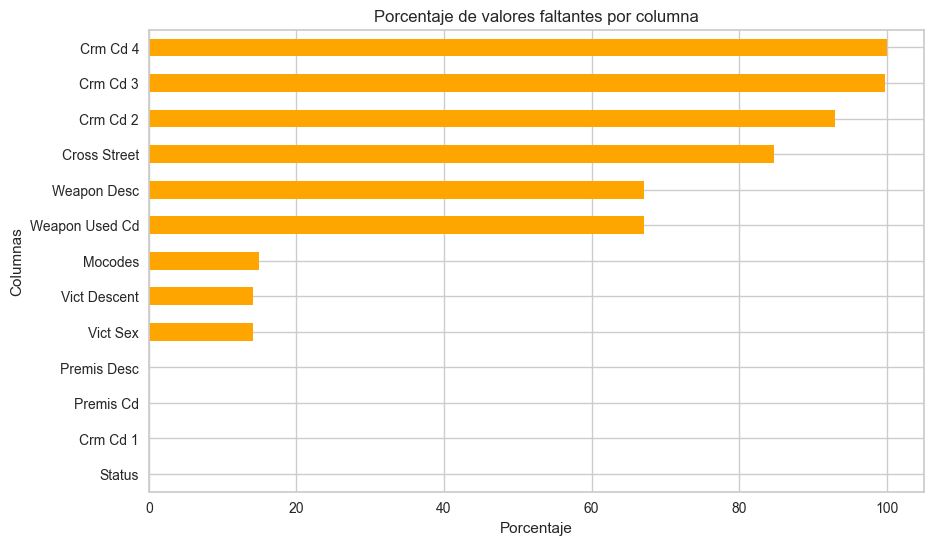

In [7]:
# Porcentaje de valores nulos por columna
missing_values = data.isnull().mean() * 100
print(missing_values[missing_values > 0].sort_values(ascending=False))

# Visualizar las columnas con valores nulos
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].sort_values().plot(kind='barh', color='orange')
plt.title("Porcentaje de valores faltantes por columna")
plt.xlabel("Porcentaje")
plt.ylabel("Columnas")
plt.show()

In [ ]:
# Definir el umbral de porcentaje de valores nulos para eliminar columnas
umbral_nulos = 60  # Porcentaje de valores nulos

# Identificar columnas con valores nulos superiores al umbral
columnas_a_eliminar = data.columns[data.isnull().mean() * 100 > umbral_nulos]

# Mostrar las columnas que serán eliminadas
print(f"Columnas a eliminar (más del {umbral_nulos}% de valores nulos):")
print(columnas_a_eliminar)

# Eliminar las columnas del dataset
data = data.drop(columns=columnas_a_eliminar)

# Confirmar la nueva forma del dataset
print(f"Forma del dataset original: {data.shape}")
print(f"Forma del dataset después de eliminar columnas: {data.shape}")

Columnas a eliminar (más del 60% de valores nulos):
Index(['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4',
       'Cross Street'],
      dtype='object')
Forma del dataset original: (984045, 22)
Forma del dataset después de eliminar columnas: (984045, 22)


In [9]:
missing_values = data.isnull().mean() * 100
print(missing_values[missing_values > 0].sort_values(ascending=False))

Mocodes         14.885397
Vict Descent    14.183701
Vict Sex        14.182685
Premis Desc      0.056501
Premis Cd        0.001423
Crm Cd 1         0.001118
Status           0.000102
dtype: float64


#   Análisis Univariado

Variables Categóricas.

Observamos la distribucion de las variables categoricas mas relevantes

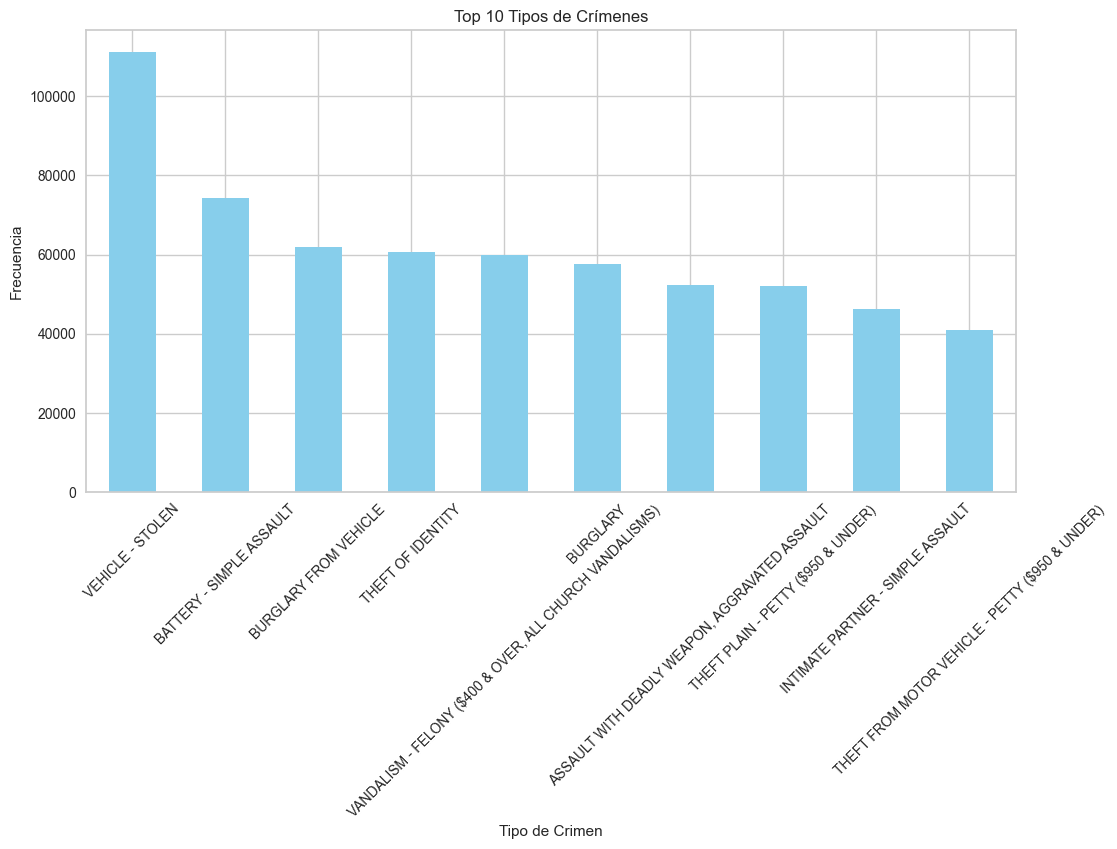

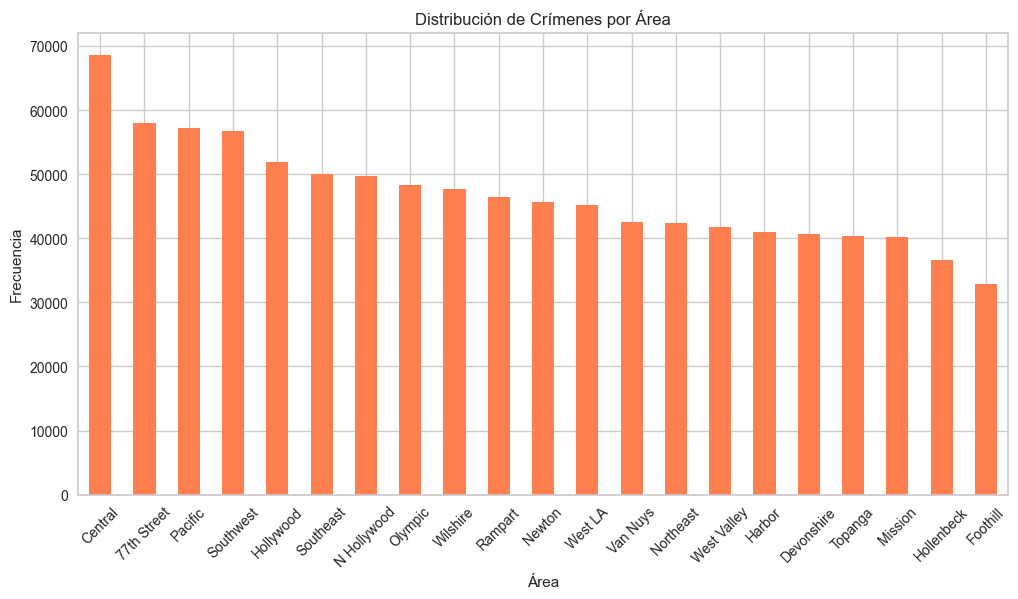

In [10]:
# Frecuencia de crímenes por tipo
plt.figure(figsize=(12, 6))
data['Crm Cd Desc'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Tipos de Crímenes")
plt.ylabel("Frecuencia")
plt.xlabel("Tipo de Crimen")
plt.xticks(rotation=45)
plt.show()

# Frecuencia de crímenes por área
plt.figure(figsize=(12, 6))
data['AREA NAME'].value_counts().plot(kind='bar', color='coral')
plt.title("Distribución de Crímenes por Área")
plt.ylabel("Frecuencia")
plt.xlabel("Área")
plt.xticks(rotation=45)
plt.show()


Variables Numéricas.

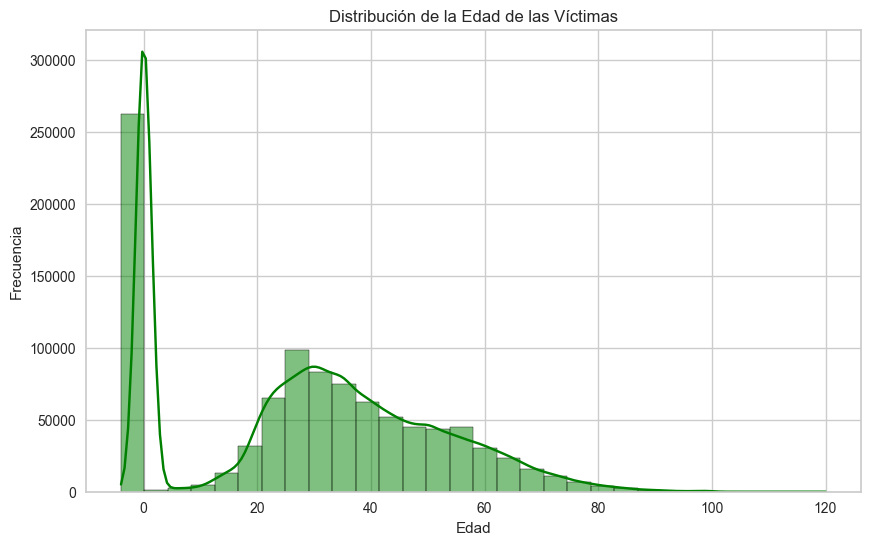

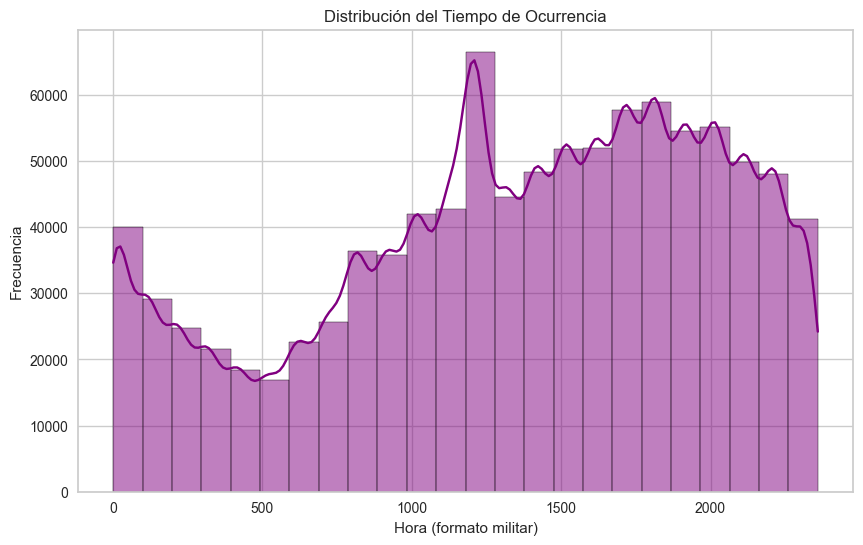

In [11]:
# Distribución de la edad de las víctimas
plt.figure(figsize=(10, 6))
sns.histplot(data['Vict Age'], kde=True, bins=30, color='green')
plt.title("Distribución de la Edad de las Víctimas")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Distribución del tiempo de ocurrencia
plt.figure(figsize=(10, 6))
sns.histplot(data['TIME OCC'], kde=True, bins=24, color='purple')
plt.title("Distribución del Tiempo de Ocurrencia")
plt.xlabel("Hora (formato militar)")
plt.ylabel("Frecuencia")
plt.show()


#   Análisis Bivariado

Relación entre Crm Cd Desc y Vict Sex.


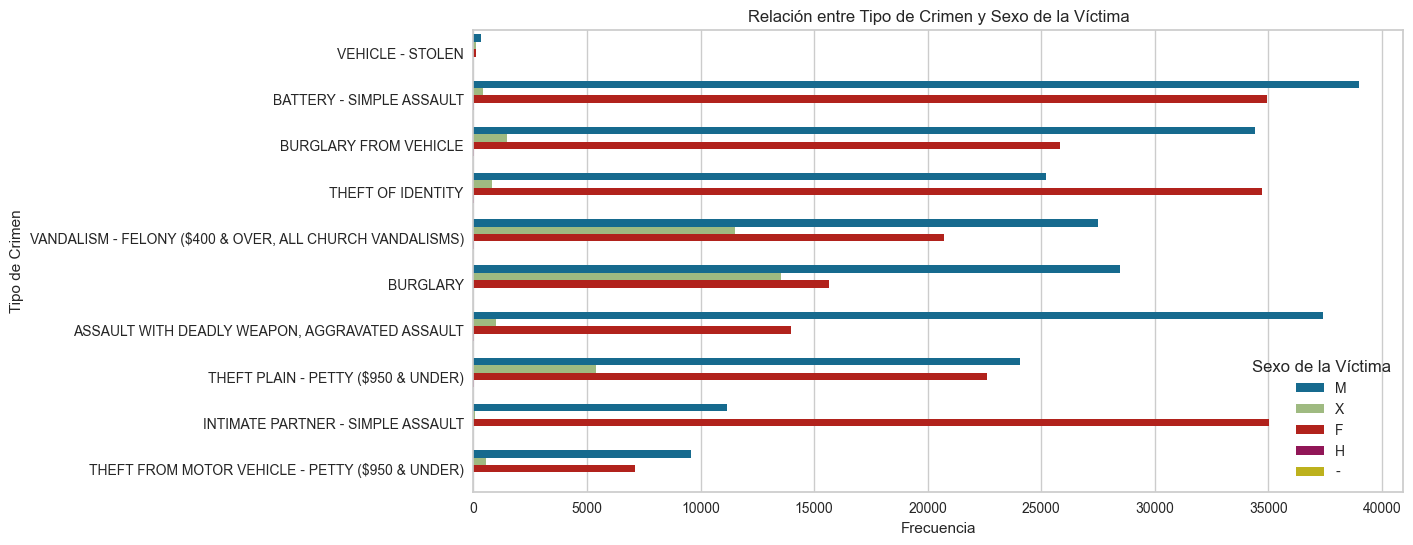

In [12]:
# Relación entre tipo de crimen y sexo de la víctima
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Crm Cd Desc', hue='Vict Sex', order=data['Crm Cd Desc'].value_counts().iloc[:10].index)
plt.title("Relación entre Tipo de Crimen y Sexo de la Víctima")
plt.ylabel("Tipo de Crimen")
plt.xlabel("Frecuencia")
plt.legend(title="Sexo de la Víctima")
plt.show()

Relación entre TIME OCC y Crm Cd Desc.

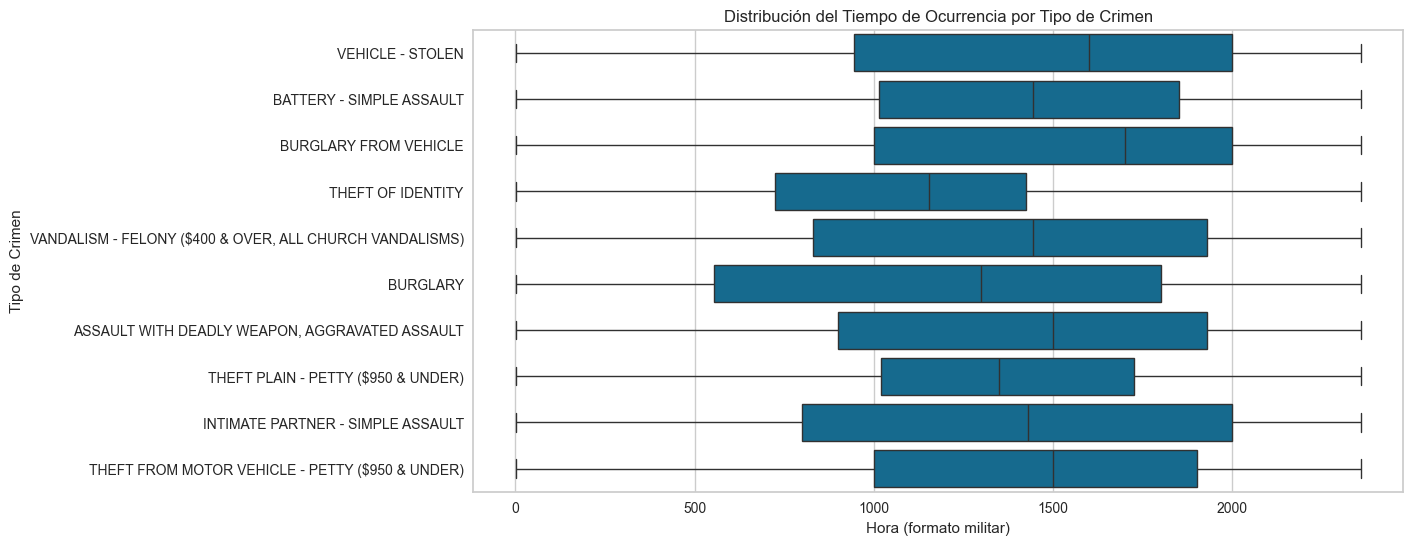

In [13]:
# Boxplot para crímenes según el tiempo
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='TIME OCC', y='Crm Cd Desc', order=data['Crm Cd Desc'].value_counts().iloc[:10].index)
plt.title("Distribución del Tiempo de Ocurrencia por Tipo de Crimen")
plt.xlabel("Hora (formato militar)")
plt.ylabel("Tipo de Crimen")
# plt.xticks(rotation=45)
plt.show()

#   Análisis Geográfico
Mapa interactivo de la ubicación de los crímenes usando LAT y LON.

In [14]:
# Selección de una muestra para visualización (opcional, si el dataset es muy grande)
sample_data = data.sample(5000, random_state=42)

# Mapa interactivo con Plotly
fig = px.scatter_mapbox(
    sample_data,
    lat="LAT",
    lon="LON",
    color="Crm Cd Desc",
    hover_name="AREA NAME",
    title="Mapa de Crímenes en Los Ángeles",
    mapbox_style="carto-positron",
    zoom=10,
    height=600
)
fig.show()


# Encoders

In [15]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Status', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON'],
      dtype='object')

In [16]:
data['Premis Desc'].unique()

array(['STREET', 'BUS STOP/LAYOVER (ALSO QUERY 124)',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'CLOTHING STORE',
       'SIDEWALK', 'SINGLE FAMILY DWELLING', 'CELL PHONE STORE',
       'CYBERSPACE', 'WEBSITE', 'OTHER BUSINESS', 'PARKING LOT',
       'OTHER RESIDENCE', 'AUTOMATED TELLER MACHINE (ATM)',
       'DEPARTMENT STORE', 'PUBLIC STORAGE', 'GARAGE/CARPORT',
       'OFFICE BUILDING/OFFICE', 'EQUIPMENT RENTAL', 'POLICE FACILITY',
       'MTA BUS', 'SPECIALTY SCHOOL/OTHER',
       'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)', 'BANK',
       'SKATING RINK*', 'BUS STOP', 'JUNIOR HIGH SCHOOL', 'OTHER/OUTSIDE',
       'ALLEY', 'VEHICLE, PASSENGER/TRUCK',
       'ABANDONED BUILDING ABANDONED HOUSE',
       'TRANSPORTATION FACILITY (AIRPORT)', 'MOTEL', 'HOSPITAL',
       'BUS, SCHOOL, CHURCH', 'OTHER PREMISE', 'STORAGE SHED',
       'OTHER STORE', 'HIGH SCHOOL', 'MAIL BOX', 'HOTEL',
       'NIGHT CLUB (OPEN EVENINGS ONLY)', 'FINANCE COMPANY',
       'PARK/PLAYGROUND'

In [17]:
# Contar frecuencia de las categorías en Premis Desc
frec_premis_desc = data['Premis Desc'].value_counts()

# Mostrar las 30 categorías más comunes
print(frec_premis_desc.head(30))


Premis Desc
STREET                                          254338
SINGLE FAMILY DWELLING                          161240
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    117255
PARKING LOT                                      67649
OTHER BUSINESS                                   46919
SIDEWALK                                         40350
VEHICLE, PASSENGER/TRUCK                         28766
GARAGE/CARPORT                                   18766
DRIVEWAY                                         16031
DEPARTMENT STORE                                 14144
RESTAURANT/FAST FOOD                             12111
PARKING UNDERGROUND/BUILDING                      8358
OTHER PREMISE                                     7880
MARKET                                            7835
OTHER RESIDENCE                                   7117
ALLEY                                             6875
PARK/PLAYGROUND                                   6498
YARD (RESIDENTIAL/BUSINESS)                       596

Revisamos si hay registros duplicados

In [18]:
duplicados_completos = data[data.duplicated()]
print(f"Número de duplicados completos: {len(duplicados_completos)}")

Número de duplicados completos: 85478


In [19]:
# Eliminar duplicados completos
data = data.drop_duplicates()
print(f"Nuevo tamaño tras eliminar duplicados completos: {data.shape}")


Nuevo tamaño tras eliminar duplicados completos: (898567, 22)


In [20]:
duplicados_dr_no = data[data['DR_NO'].duplicated(keep=False)]
print(f"Número de duplicados en DR_NO: {len(duplicados_dr_no)}")

Número de duplicados en DR_NO: 0


In [21]:
print(duplicados_dr_no.sort_values('DR_NO').head(10))

Empty DataFrame
Columns: [DR_NO, Date Rptd, DATE OCC, TIME OCC, AREA, AREA NAME, Rpt Dist No, Part 1-2, Crm Cd, Crm Cd Desc, Mocodes, Vict Age, Vict Sex, Vict Descent, Premis Cd, Premis Desc, Status, Status Desc, Crm Cd 1, LOCATION, LAT, LON]
Index: []

[0 rows x 22 columns]


In [22]:
data['DR_NO'].value_counts()

DR_NO
190326475    1
230411658    1
230513392    1
230126958    1
231710942    1
            ..
210815155    1
210708377    1
210319881    1
210715594    1
240910892    1
Name: count, Length: 898567, dtype: int64

In [23]:
# Contar frecuencia de las categorías en Premis Desc
frec_premis_desc = data['Premis Desc'].value_counts()

# Mostrar las 1000 categorías más comunes
top_200_premis = frec_premis_desc.head(1000)
print(top_200_premis)

# Guardar en un archivo si prefieres enviármelo directamente
top_200_premis.to_csv('top_200_premis_desc.csv', index=True)


Premis Desc
STREET                                          233730
SINGLE FAMILY DWELLING                          144676
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    107548
PARKING LOT                                      60866
OTHER BUSINESS                                   43297
                                                 ...  
HORSE RACING/SANTA ANITA PARK*                       2
MTA - SILVER LINE - LAC/USC MEDICAL CENTER           2
DEPT OF DEFENSE FACILITY                             2
CHEMICAL STORAGE/MANUFACTURING PLANT                 2
MTA - SILVER LINE - DOWNTOWN STREET STOPS            2
Name: count, Length: 305, dtype: int64


In [24]:
# Diccionario de clasificación compacto
clasificacion = {
    # Residencial
    'SINGLE FAMILY DWELLING': 'Residencial',
    'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)': 'Residencial',
    'GARAGE/CARPORT': 'Residencial',
    'DRIVEWAY': 'Residencial',
    'OTHER RESIDENCE': 'Residencial',
    'YARD (RESIDENTIAL/BUSINESS)': 'Residencial',
    'PORCH, RESIDENTIAL': 'Residencial',
    'CONDOMINIUM/TOWNHOUSE': 'Residencial',
    'STORAGE SHED': 'Residencial',
    'ABANDONED BUILDING ABANDONED HOUSE': 'Residencial',
    'GROUP HOME': 'Residencial',
    'MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV\'S/MOTORHOME': 'Residencial',
    'TRANSITIONAL HOUSING/HALFWAY HOUSE': 'Residencial',
    'PATIO*': 'Residencial',
    'SINGLE RESIDENCE OCCUPANCY (SRO\'S) LOCATIONS': 'Residencial',
    'PROJECT/TENEMENT/PUBLIC HOUSING': 'Residencial',
    'BALCONY*': 'Residencial',
    'APARTMENT/CONDO COMMON LAUNDRY ROOM': 'Residencial',
    'FRAT HOUSE/SORORITY/DORMITORY': 'Residencial',
    'SHORT-TERM VACATION RENTAL': 'Residencial',
    'TOOL SHED*': 'Residencial',
    'FOSTER HOME BOYS OR GIRLS*': 'Residencial',

    # Comercial
    'OTHER BUSINESS': 'Comercial',
    'DEPARTMENT STORE': 'Comercial',
    'RESTAURANT/FAST FOOD': 'Comercial',
    'MARKET': 'Comercial',
    'CLOTHING STORE': 'Comercial',
    'GAS STATION': 'Comercial',
    'HOTEL': 'Comercial',
    'OTHER STORE': 'Comercial',
    'DRUG STORE': 'Comercial',
    'MINI-MART': 'Comercial',
    'BANK': 'Comercial',
    'PUBLIC STORAGE': 'Comercial',
    'OFFICE BUILDING/OFFICE': 'Comercial',
    'LIQUOR STORE': 'Comercial',
    'AUTOMATED TELLER MACHINE (ATM)': 'Comercial',
    'MOTEL': 'Comercial',
    'HEALTH SPA/GYM': 'Comercial',
    'WAREHOUSE': 'Comercial',
    'CONSTRUCTION SITE': 'Comercial',
    'SHOPPING MALL (COMMON AREA)': 'Comercial',
    'LAUNDROMAT': 'Comercial',
    'CELL PHONE STORE': 'Comercial',
    'COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET\'S, ETC.)': 'Comercial',
    'DIY CENTER (LOWE\'S, HOME DEPOT, OSH, CONTRACTORS WAREHOUSE)': 'Comercial',
    'DISCOUNT STORE (99 CENT, DOLLAR, ETC.)': 'Comercial',
    'AUTO REPAIR SHOP': 'Comercial',
    'THE GROVE': 'Comercial',
    'BEAUTY/BARBER SHOP': 'Comercial',
    'AUTO SUPPLY STORE*': 'Comercial',
    'CAR WASH': 'Comercial',
    'MEMBERSHIP STORE (COSTCO, SAM\'S CLUB)*': 'Comercial',
    'BEAUTY SUPPLY STORE': 'Comercial',
    'TOBACCO SHOP': 'Comercial',
    'PHARMACY INSIDE STORE OR SUPERMARKET*': 'Comercial',
    'HARDWARE/BUILDING SUPPLY': 'Comercial',
    'THE BEVERLY CONNECTION': 'Comercial',
    'AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)': 'Comercial',
    'JEWELRY STORE': 'Comercial',
    'THE BEVERLY CENTER': 'Comercial',
    'GUN/SPORTING GOODS': 'Comercial',
    'DELIVERY SERVICE (FED EX, UPS, COURIERS, COURIER SERVICE)*': 'Comercial',
    'NAIL SALON': 'Comercial',
    'CHECK CASHING*': 'Comercial',
    'AUTO SALES LOT': 'Comercial',
    'HIGH-RISE BUILDING': 'Comercial',
    'ELECTRONICS STORE (IE: RADIO SHACK, ETC.)': 'Comercial',
    'TOW YARD*': 'Comercial',
    'NURSERY/FLOWER SHOP': 'Comercial',
    'RECYCLING CENTER': 'Comercial',
    'PET STORE': 'Comercial',
    'MASSAGE PARLOR': 'Comercial',
    'DRIVE THRU*': 'Comercial',
    'CLEANER/LAUNDROMAT': 'Comercial',
    'MANUFACTURING COMPANY': 'Comercial',
    'SWAP MEET': 'Comercial',
    'FURNITURE STORE': 'Comercial',
    'TELECOMMUNICATION FACILITY/LOCATION': 'Comercial',
    'PAWN SHOP': 'Comercial',
    'CREDIT UNION': 'Comercial',
    'TATTOO PARLOR*': 'Comercial',
    'BOOK STORE': 'Comercial',
    'EQUIPMENT RENTAL': 'Comercial',
    'FACTORY': 'Comercial',
    'CATERING/ICE CREAM TRUCK': 'Comercial',
    'TV/RADIO/APPLIANCE': 'Comercial',
    'RECORD-CD MUSIC/COMPUTER GAME STORE': 'Comercial',
    'BANKING INSIDE MARKET-STORE *': 'Comercial',
    'GARMENT MANUFACTURER': 'Comercial',
    'OPTICAL OFFICE INSIDE STORE OR SUPERMARKET*': 'Comercial',
    'ESCALATOR*': 'Comercial',
    'VIDEO RENTAL STORE': 'Comercial',
    'BANK DROP BOX/MONEY DROP-OUTSIDE OF BANK*': 'Comercial',
    'SURPLUS SURVIVAL STORE': 'Comercial',
    'COMPUTER SERVICES/REPAIRS/SALES': 'Comercial',
    'DRIVE THRU BANKING (WINDOW)*': 'Comercial',

    # Transporte
    'PARKING LOT': 'Transporte',
    'VEHICLE, PASSENGER/TRUCK': 'Transporte',
    'PARKING UNDERGROUND/BUILDING': 'Transporte',
    'TRANSPORTATION FACILITY (AIRPORT)': 'Transporte',
    'MTA BUS': 'Transporte',
    'BUS STOP': 'Transporte',
    'LA UNION STATION (NOT LINE SPECIFIC)': 'Transporte',
    'MTA PROPERTY OR PARKING LOT': 'Transporte',
    'MTA - RED LINE - [VARIAS ESTACIONES]': 'Transporte',
    'MTA - EXPO LINE - [VARIAS ESTACIONES]': 'Transporte',
    'MTA - BLUE LINE - [VARIAS ESTACIONES]': 'Transporte',
    'MTA - PURPLE LINE - [VARIAS ESTACIONES]': 'Transporte',
    'MTA - GREEN LINE - [VARIAS ESTACIONES]': 'Transporte',
    'MTA - GOLD LINE - [VARIAS ESTACIONES]': 'Transporte',
    'METROLINK TRAIN': 'Transporte',
    'VEHICLE STORAGE LOT (CARS, TRUCKS, RV\'S, BOATS, TRAILERS, ETC.)': 'Transporte',
    'MUNICIPAL BUS LINE INCLUDES LADOT/DASH': 'Transporte',
    'TAXI': 'Transporte',
    'FREEWAY': 'Transporte',
    'TRAIN TRACKS': 'Transporte',
    'BUS-CHARTER/PRIVATE': 'Transporte',
    'GREYHOUND OR INTERSTATE BUS': 'Transporte',
    'OTHER RR TRAIN (UNION PAC, SANTA FE ETC)': 'Transporte',
    'AIRCRAFT': 'Transporte',
    'AMTRAK TRAIN': 'Transporte',
    'TRAIN DEPOT/TERMINAL, OTHER THAN MTA': 'Transporte',
    'BUS DEPOT/TERMINAL, OTHER THAN MTA': 'Transporte',
    'TRUCK, COMMERCIAL': 'Transporte',
    'OTHER INTERSTATE, CHARTER BUS': 'Transporte',
    'TUNNEL': 'Transporte',
    'VALET': 'Transporte',
    'SLIPS/DOCK/MARINA/BOAT': 'Transporte',
    'MTA - SILVER LINE - [VARIAS ESTACIONES]': 'Transporte',

    # Educación
    'HIGH SCHOOL': 'Educación',
    'ELEMENTARY SCHOOL': 'Educación',
    'JUNIOR HIGH SCHOOL': 'Educación',
    'COLLEGE/JUNIOR COLLEGE/UNIVERSITY': 'Educación',
    'SPECIALTY SCHOOL/OTHER': 'Educación',
    'PRIVATE SCHOOL/PRESCHOOL': 'Educación',
    'TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*': 'Educación',
    'DAY CARE/CHILDREN*': 'Educación',

    # Salud
    'HOSPITAL': 'Salud',
    'NURSING/CONVALESCENT/RETIREMENT HOME': 'Salud',
    'MEDICAL/DENTAL OFFICES': 'Salud',
    'MEDICAL MARIJUANA FACILITIES/BUSINESSES': 'Salud',
    'VISION CARE FACILITY*': 'Salud',
    'VETERINARIAN/ANIMAL HOSPITAL': 'Salud',
    'HOSPICE': 'Salud',
    'METHADONE CLINIC': 'Salud',
    'ABORTION CLINIC/ABORTION FACILITY*': 'Salud',

    # Gobierno
    'POLICE FACILITY': 'Gobierno',
    'GOVERNMENT FACILITY (FEDERAL, STATE, COUNTY & CITY)': 'Gobierno',
    'POST OFFICE': 'Gobierno',
    'FIRE STATION': 'Gobierno',
    'DETENTION/JAIL FACILITY': 'Gobierno',
    'DEPT OF DEFENSE FACILITY': 'Gobierno',

    # Entretenimiento
    'BAR/COCKTAIL/NIGHTCLUB': 'Entretenimiento',
    'NIGHT CLUB (OPEN EVENINGS ONLY)': 'Entretenimiento',
    'BAR/SPORTS BAR (OPEN DAY & NIGHT)': 'Entretenimiento',
    'DODGER STADIUM': 'Entretenimiento',
    'THEATRE/MOVIE': 'Entretenimiento',
    'STUDIO (FILM/PHOTOGRAPHIC/MUSIC)': 'Entretenimiento',
    'ENTERTAINMENT/COMEDY CLUB (OTHER)': 'Entretenimiento',
    'SPORTS ARENA': 'Entretenimiento',
    'SPORTS VENUE, OTHER': 'Entretenimiento',
    'COLISEUM': 'Entretenimiento',
    'GOLF COURSE*': 'Entretenimiento',
    'POOL-PUBLIC/OUTDOOR OR INDOOR*': 'Entretenimiento',
    'BOWLING ALLEY*': 'Entretenimiento',
    'ARCADE, GAME ROOM/VIDEO GAMES (EXAMPLE CHUCKIE CHEESE)*': 'Entretenimiento',
    'SKATEBOARD FACILITY/SKATEBOARD PARK*': 'Entretenimiento',
    'BASKETBALL COURTS': 'Entretenimiento',
    'AMUSEMENT PARK*': 'Entretenimiento',
    'SKATING RINK*': 'Entretenimiento',
    'HANDBALL COURTS': 'Entretenimiento',
    'HORSE RACING/SANTA ANITA PARK*': 'Entretenimiento',
    'MUSCLE BEACH': 'Entretenimiento',
    'SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN\'S CLUB': 'Entretenimiento',

    # Religioso
    'CHURCH/CHAPEL': 'Religioso',
    'SYNAGOGUE/TEMPLE': 'Religioso',
    'OTHER PLACE OF WORSHIP': 'Religioso',
    'MOSQUE*': 'Religioso',

    # Vía Pública
    'STREET': 'Vía Pública',
    'SIDEWALK': 'Vía Pública',
    'ALLEY': 'Vía Pública',
    'OTHER/OUTSIDE': 'Vía Pública',
    'UNDERPASS/BRIDGE*': 'Vía Pública',
    'RIVER BED*': 'Vía Pública',
    'PEDESTRIAN OVERCROSSING': 'Vía Pública',

    # Instalaciones Públicas
    'PARK/PLAYGROUND': 'Instalaciones Públicas',
    'BEACH': 'Instalaciones Públicas',
    'MISSIONS/SHELTERS': 'Instalaciones Públicas',
    'LIBRARY': 'Instalaciones Públicas',
    'PUBLIC RESTROOM (INDOORS-INSIDE)': 'Instalaciones Públicas',
    'PUBLIC RESTROOM/OUTSIDE*': 'Instalaciones Públicas',
    'CONVENTION CENTER': 'Instalaciones Públicas',
    'MUSEUM': 'Instalaciones Públicas',
    'CEMETERY*': 'Instalaciones Públicas',
    'CULTURAL SIGNIFICANCE/MONUMENT': 'Instalaciones Públicas',
    'MASS GATHERING LOCATION': 'Instalaciones Públicas',
}


In [25]:
# Aplicar la clasificación al dataset original
data['Premis Desc Clasificado'] = data['Premis Desc'].map(clasificacion).fillna('Otros')

# Crear un nuevo dataframe con la columna clasificada
dataenco = data.copy()

label_encoder = LabelEncoder()

dataenco['Premis Desc Clasificado'] = label_encoder.fit_transform(data['Premis Desc Clasificado'])

# Mostrar las clases y su mapeo
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapa de codificación:")
print(class_mapping)

Mapa de codificación:
{'Comercial': 0, 'Educación': 1, 'Entretenimiento': 2, 'Gobierno': 3, 'Instalaciones Públicas': 4, 'Otros': 5, 'Religioso': 6, 'Residencial': 7, 'Salud': 8, 'Transporte': 9, 'Vía Pública': 10}


In [26]:
data['Premis Desc Clasificado'].value_counts()

Premis Desc Clasificado
Residencial               307681
Vía Pública               280947
Comercial                 140933
Transporte                106697
Otros                      29900
Instalaciones Públicas      9312
Educación                   8966
Entretenimiento             6641
Salud                       4847
Gobierno                    2356
Religioso                    287
Name: count, dtype: int64

In [27]:
dataenco['Premis Desc Clasificado'].value_counts()

Premis Desc Clasificado
7     307681
10    280947
0     140933
9     106697
5      29900
4       9312
1       8966
2       6641
8       4847
3       2356
6        287
Name: count, dtype: int64

In [28]:
# # data['Crm Cd Desc'].value_counts()

# # Contar frecuencia de las categorías en Crm Cd Desc
# frec_crm_cd_desc = data['Crm Cd Desc'].value_counts()

# # Mostrar las 1000 categorías más comunes
# top_1000_crm_cd_desc = frec_crm_cd_desc.head(1000)
# print(top_1000_crm_cd_desc)

# # Guardar en un archivo si prefieres enviármelo directamente
# top_1000_crm_cd_desc.to_csv('top_1000_crm_cd_desc.csv', index=True)

In [29]:
clasificacion = {
    # Robo y Hurto
    'THEFT PLAIN - PETTY ($950 & UNDER)': 'Robo y Hurto',
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'Robo y Hurto',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'Robo y Hurto',
    'THEFT-GRAND ($950.01 & OVER) EXCEPT GUNS, FOWL, LIVESTOCK, PROD': 'Robo y Hurto',
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 'Robo y Hurto',
    'BIKE - STOLEN': 'Robo y Hurto',
    'BUNCO, GRAND THEFT': 'Robo y Hurto',
    'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)': 'Robo y Hurto',
    'THEFT, PERSON': 'Robo y Hurto',
    'PICKPOCKET': 'Robo y Hurto',
    'BUNCO, PETTY THEFT': 'Robo y Hurto',
    'THEFT PLAIN - ATTEMPT': 'Robo y Hurto',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER': 'Robo y Hurto',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01': 'Robo y Hurto',
    'PURSE SNATCHING': 'Robo y Hurto',
    'THEFT FROM PERSON - ATTEMPT': 'Robo y Hurto',
    'DRUNK ROLL': 'Robo y Hurto',
    'DISHONEST EMPLOYEE - GRAND THEFT': 'Robo y Hurto',
    'DISHONEST EMPLOYEE - PETTY THEFT': 'Robo y Hurto',
    'TILL TAP - PETTY ($950 & UNDER)': 'Robo y Hurto',
    'TILL TAP - GRAND THEFT ($950.01 & OVER)': 'Robo y Hurto',
    'THEFT, COIN MACHINE - PETTY ($950 & UNDER)': 'Robo y Hurto',
    'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)': 'Robo y Hurto',
    'GRAND THEFT / AUTO REPAIR': 'Robo y Hurto',
    'PETTY THEFT - AUTO REPAIR': 'Robo y Hurto',
    'PICKPOCKET, ATTEMPT': 'Robo y Hurto',
    'BIKE - ATTEMPTED STOLEN': 'Robo y Hurto',
    'DRUNK ROLL - ATTEMPT': 'Robo y Hurto',
    'DISHONEST EMPLOYEE ATTEMPTED THEFT': 'Robo y Hurto',
    'THEFT, COIN MACHINE - ATTEMPT': 'Robo y Hurto',
    'PURSE SNATCHING - ATTEMPT': 'Robo y Hurto',
    'SHOPLIFTING - ATTEMPT': 'Robo y Hurto',

    # Allanamiento y Robo en Propiedad
    'BURGLARY': 'Allanamiento y Robo en Propiedad',
    'BURGLARY FROM VEHICLE': 'Allanamiento y Robo en Propiedad',
    'BURGLARY, ATTEMPTED': 'Allanamiento y Robo en Propiedad',
    'BURGLARY FROM VEHICLE, ATTEMPTED': 'Allanamiento y Robo en Propiedad',
    'TRESPASSING': 'Allanamiento y Robo en Propiedad',
    'PROWLER': 'Allanamiento y Robo en Propiedad',

    # Delitos Relacionados con Vehículos
    'VEHICLE - STOLEN': 'Delitos Relacionados con Vehículos',
    'VEHICLE - ATTEMPT STOLEN': 'Delitos Relacionados con Vehículos',
    'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)': 'Delitos Relacionados con Vehículos',
    'DRIVING WITHOUT OWNER CONSENT (DWOC)': 'Delitos Relacionados con Vehículos',
    'BOAT - STOLEN': 'Delitos Relacionados con Vehículos',
    'THROWING OBJECT AT MOVING VEHICLE': 'Delitos Relacionados con Vehículos',

    # Agresión y Violencia
    'BATTERY - SIMPLE ASSAULT': 'Agresión y Violencia',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Agresión y Violencia',
    'CRIMINAL THREATS - NO WEAPON DISPLAYED': 'Agresión y Violencia',
    'BRANDISH WEAPON': 'Agresión y Violencia',
    'OTHER ASSAULT': 'Agresión y Violencia',
    'BATTERY POLICE (SIMPLE)': 'Agresión y Violencia',
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER': 'Agresión y Violencia',
    'BATTERY ON A FIREFIGHTER': 'Agresión y Violencia',
    'RESISTING ARREST': 'Agresión y Violencia',
    'FALSE IMPRISONMENT': 'Agresión y Violencia',
    'BATTERY WITH SEXUAL CONTACT': 'Agresión y Violencia',
    'STALKING': 'Agresión y Violencia',
    'KIDNAPPING - GRAND ATTEMPT': 'Agresión y Violencia',

    # Homicidio
    'CRIMINAL HOMICIDE': 'Homicidio',
    'MANSLAUGHTER, NEGLIGENT': 'Homicidio',
    'LYNCHING': 'Homicidio',
    'LYNCHING - ATTEMPTED': 'Homicidio',

    # Delitos Sexuales
    'RAPE, FORCIBLE': 'Delitos Sexuales',
    'SEXUAL PENETRATION W/FOREIGN OBJECT': 'Delitos Sexuales',
    'INDECENT EXPOSURE': 'Delitos Sexuales',
    'SEX, UNLAWFUL (INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ)': 'Delitos Sexuales',
    'ORAL COPULATION': 'Delitos Sexuales',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH': 'Delitos Sexuales',
    'LEWD CONDUCT': 'Delitos Sexuales',
    'CHILD PORNOGRAPHY': 'Delitos Sexuales',
    'LEWD/LASCIVIOUS ACTS WITH CHILD': 'Delitos Sexuales',
    'CHILD ANNOYING (17YRS & UNDER)': 'Delitos Sexuales',
    'PEEPING TOM': 'Delitos Sexuales',
    'PANDERING': 'Delitos Sexuales',
    'PIMPING': 'Delitos Sexuales',
    'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM': 'Delitos Sexuales',
    'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)': 'Delitos Sexuales',
    'BATTERY WITH SEXUAL CONTACT': 'Delitos Sexuales',
    'RAPE, ATTEMPTED': 'Delitos Sexuales',

    # Fraude y Falsificación
    'THEFT OF IDENTITY': 'Fraude y Falsificación',
    'DOCUMENT FORGERY / STOLEN FELONY': 'Fraude y Falsificación',
    'EXTORTION': 'Fraude y Falsificación',
    'BUNCO, GRAND THEFT': 'Fraude y Falsificación',
    'BUNCO, PETTY THEFT': 'Fraude y Falsificación',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)': 'Fraude y Falsificación',
    'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)': 'Fraude y Falsificación',
    'UNAUTHORIZED COMPUTER ACCESS': 'Fraude y Falsificación',
    'COUNTERFEIT': 'Fraude y Falsificación',
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)': 'Fraude y Falsificación',
    'CREDIT CARDS, FRAUD USE ($950 & UNDER)': 'Fraude y Falsificación',
    'DOCUMENT WORTHLESS ($200.01 & OVER)': 'Fraude y Falsificación',
    'DOCUMENT WORTHLESS ($200 & UNDER)': 'Fraude y Falsificación',
    'GRAND THEFT / INSURANCE FRAUD': 'Fraude y Falsificación',
    'CONSPIRACY': 'Fraude y Falsificación',

    # Vandalismo
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'Vandalismo',
    'VANDALISM - MISDEMEANOR ($399 OR UNDER)': 'Vandalismo',
    'DISCHARGE FIREARMS/SHOTS FIRED': 'Vandalismo',
    'SHOTS FIRED AT INHABITED DWELLING': 'Vandalismo',
    'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT': 'Vandalismo',
    'TELEPHONE PROPERTY - DAMAGE': 'Vandalismo',
    'ILLEGAL DUMPING': 'Vandalismo',
    'CRUELTY TO ANIMALS': 'Vandalismo',

    # Secuestro
    'KIDNAPPING': 'Secuestro',
    'CHILD STEALING': 'Secuestro',
    'FALSE IMPRISONMENT': 'Secuestro',
    'KIDNAPPING - GRAND ATTEMPT': 'Secuestro',

    # Incendio Provocado (Arson)
    'ARSON': 'Incendio Provocado (Arson)',
    'BOMB SCARE': 'Incendio Provocado (Arson)',

    # Violaciones de Armas
    'BRANDISH WEAPON': 'Violaciones de Armas',
    'WEAPONS POSSESSION/BOMBING': 'Violaciones de Armas',
    'REPLICA FIREARMS (SALE, DISPLAY, MANUFACTURE OR DISTRIBUTE)': 'Violaciones de Armas',
    'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)': 'Violaciones de Armas',
    'FIREARMS RESTRAINING ORDER (FIREARMS RO)': 'Violaciones de Armas',

    # Violencia Doméstica
    'INTIMATE PARTNER - SIMPLE ASSAULT': 'Violencia Doméstica',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT': 'Violencia Doméstica',
    'VIOLATION OF RESTRAINING ORDER': 'Violencia Doméstica',
    'VIOLATION OF TEMPORARY RESTRAINING ORDER': 'Violencia Doméstica',
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT': 'Violencia Doméstica',
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT': 'Violencia Doméstica',
    'CHILD NEGLECT (SEE 300 W.I.C.)': 'Violencia Doméstica',
    'CHILD ABANDONMENT': 'Violencia Doméstica',

    # Delitos Relacionados con Menores
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)': 'Delitos Relacionados con Menores',
    'CONTRIBUTING': 'Delitos Relacionados con Menores',
    'CHILD PORNOGRAPHY': 'Delitos Relacionados con Menores',
    'CHILD ANNOYING (17YRS & UNDER)': 'Delitos Relacionados con Menores',
    'CHILD STEALING': 'Delitos Relacionados con Menores',
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT': 'Delitos Relacionados con Menores',
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT': 'Delitos Relacionados con Menores',
    'CHILD NEGLECT (SEE 300 W.I.C.)': 'Delitos Relacionados con Menores',
    'CHILD ABANDONMENT': 'Delitos Relacionados con Menores',
    'DRUGS, TO A MINOR': 'Delitos Relacionados con Menores'
}



In [30]:
print(dataenco.columns)


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Status', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON',
       'Premis Desc Clasificado'],
      dtype='object')


In [31]:
# Aplicar la clasificación al dataset original
data['Crm Cd Desc Clasificado'] = data['Crm Cd Desc'].map(clasificacion).fillna('Otros')


label_encoder = LabelEncoder()

dataenco['Crm Cd Desc Clasificado'] = label_encoder.fit_transform(data['Crm Cd Desc Clasificado'])

# Mostrar las clases y su mapeo
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapa de codificación:")
print(class_mapping)

Mapa de codificación:
{'Agresión y Violencia': 0, 'Allanamiento y Robo en Propiedad': 1, 'Delitos Relacionados con Menores': 2, 'Delitos Relacionados con Vehículos': 3, 'Delitos Sexuales': 4, 'Fraude y Falsificación': 5, 'Homicidio': 6, 'Incendio Provocado (Arson)': 7, 'Otros': 8, 'Robo y Hurto': 9, 'Secuestro': 10, 'Vandalismo': 11, 'Violaciones de Armas': 12, 'Violencia Doméstica': 13}


In [32]:
dataenco['Crm Cd Desc Clasificado'].value_counts()

Crm Cd Desc Clasificado
9     166406
0     142337
1     130428
8     116284
3     109043
5      72080
13     64104
11     59402
12     13189
4      11961
2       7902
7       2727
6       1433
10      1271
Name: count, dtype: int64

In [33]:
data['AREA'].value_counts()

AREA
1     68298
12    57416
3     56339
6     51524
7     47282
2     46071
14    45690
8     44642
9     42082
11    42080
10    41335
5     40659
15    39595
18    39119
13    38791
20    38723
4     36394
17    32764
21    32273
19    31685
16    25805
Name: count, dtype: int64

In [34]:
data['AREA NAME'].value_counts()

AREA NAME
Central        68298
77th Street    57416
Southwest      56339
Hollywood      51524
Wilshire       47282
Rampart        46071
Pacific        45690
West LA        44642
Van Nuys       42082
Northeast      42080
West Valley    41335
Harbor         40659
N Hollywood    39595
Southeast      39119
Newton         38791
Olympic        38723
Hollenbeck     36394
Devonshire     32764
Topanga        32273
Mission        31685
Foothill       25805
Name: count, dtype: int64

In [35]:
data['Vict Sex'].value_counts()

Vict Sex
M    360596
F    319761
X     90156
H        94
-         1
Name: count, dtype: int64

In [36]:
# Reemplazar '-' por 'Indeterminado' en la columna 'Vict Sex'
data['Vict Sex'] = data['Vict Sex'].replace('-', 'X')
data['Vict Sex'] = data['Vict Sex'].replace('H', 'X')
data['Vict Sex'] = data['Vict Sex'].replace('x', 'X')

# Verificar los cambios
print(data['Vict Sex'].value_counts())


Vict Sex
M    360596
F    319761
X     90251
Name: count, dtype: int64


In [37]:
# Aplicar la clasificación al dataset original
data['Vict Sex Clasificado'] = data['Vict Sex'].fillna('X')

label_encoder = LabelEncoder()

dataenco['Vict Sex Clasificado'] = label_encoder.fit_transform(data['Vict Sex Clasificado'])

# Mostrar las clases y su mapeo
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapa de codificación:")
print(class_mapping)

Mapa de codificación:
{'F': 0, 'M': 1, 'X': 2}


In [38]:
data['Vict Age'].value_counts()

Vict Age
 0      241677
 30      19976
 31      19203
 35      19184
 29      19113
         ...  
 98         59
-2          14
-3           5
-4           3
 120         1
Name: count, Length: 104, dtype: int64

In [39]:
data['Vict Age'].value_counts()

Vict Age
 0      241677
 30      19976
 31      19203
 35      19184
 29      19113
         ...  
 98         59
-2          14
-3           5
-4           3
 120         1
Name: count, Length: 104, dtype: int64

In [40]:
# data['Crm Cd Desc'].value_counts()

# Contar frecuencia de las categorías en Crm Cd Desc
frec_Vict_Age = data['Vict Age'].value_counts()

# Mostrar las 1000 categorías más comunes
top_1000_Vict_Age = frec_Vict_Age.head(1000)
print(top_1000_Vict_Age)

# Guardar en un archivo si prefieres enviármelo directamente
top_1000_Vict_Age.to_csv('top_1000_Vict_Age.csv', index=True)

Vict Age
 0      241677
 30      19976
 31      19203
 35      19184
 29      19113
         ...  
 98         59
-2          14
-3           5
-4           3
 120         1
Name: count, Length: 104, dtype: int64


In [41]:
# Asegurar que la columna Vict Age sea numérica
data['Vict Age'] = pd.to_numeric(data['Vict Age'], errors='coerce')
dataenco['Vict Age'] = pd.to_numeric(dataenco['Vict Age'], errors='coerce')

# Reemplazar valores negativos por su valor absoluto
data['Vict Age'] = data['Vict Age'].abs()
dataenco['Vict Age'] = dataenco['Vict Age'].abs()

# Verificar los cambios
print(data['Vict Age'].value_counts())


Vict Age
0      241677
30      19976
31      19203
35      19184
29      19113
        ...  
96         91
97         66
1          63
98         59
120         1
Name: count, Length: 101, dtype: int64


| Categoría          | Rango de Edad |
|--------------------|---------------|
| Bebés/Infantes     | 0–4 años      |
| Niños              | 5–12 años     |
| Adolescentes       | 13–17 años    |
| Jóvenes Adultos    | 18–29 años    |
| Adultos Tempranos  | 30–44 años    |
| Adultos Medios     | 45–59 años    |
| Adultos Mayores    | 60–74 años    |
| Ancianos           | 75 años o más |


In [42]:
# Eliminar filas con valores nulos o negativos en 'Vict Age'
data = data[data['Vict Age'] > 0]
dataenco = dataenco[dataenco['Vict Age'] > 0]

# Verificar el tamaño del dataset después de la eliminación
print(f"Nuevo tamaño del dataset: {data.shape}")

Nuevo tamaño del dataset: (656890, 25)


In [43]:
# Definir los grupos por edad
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 120]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']

# Crear una nueva columna con los grupos de edad
data['Age Group'] = pd.cut(data['Vict Age'], bins=bins, labels=labels, right=True)

# Verificar los conteos por grupo
print(data['Age Group'].value_counts())


Age Group
30-39    173961
20-29    161092
40-49    115890
50-59     87320
60-69     53038
10-19     33202
70-79     20916
80-89      5974
0-9        4028
90-99      1468
100+          1
Name: count, dtype: int64


In [44]:
# Aplicar la clasificación al dataset original
data['Age Group Clasificado'] = data['Age Group']

label_encoder = LabelEncoder()

dataenco['Age Group Clasificado'] = label_encoder.fit_transform(data['Age Group Clasificado'])

# Mostrar las clases y su mapeo
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapa de codificación:")
print(class_mapping)

Mapa de codificación:
{'0-9': 0, '10-19': 1, '100+': 2, '20-29': 3, '30-39': 4, '40-49': 5, '50-59': 6, '60-69': 7, '70-79': 8, '80-89': 9, '90-99': 10}


In [45]:
dataenco.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Status', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON',
       'Premis Desc Clasificado', 'Crm Cd Desc Clasificado',
       'Vict Sex Clasificado', 'Age Group Clasificado'],
      dtype='object')

#   se eliminan columnas en dataenco

In [46]:
borrar = ['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC',  'Rpt Dist No','AREA NAME','Crm Cd',
       'Part 1-2', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Status', 'Status Desc',
       'Crm Cd 1', 'LOCATION','LAT','LON']
dataenco = dataenco.drop(columns=borrar)

In [47]:
data['LOCATION'].head()

1     1000 S  FLOWER                       ST
2     1400 W  37TH                         ST
3    14000    RIVERSIDE                    DR
4                           1900    TRANSIENT
5     9900    COMPTON                      AV
Name: LOCATION, dtype: object

### Índice y Significado de `Status Desc`

| **Índice**       | **Significado**                                                               |
|-------------------|-------------------------------------------------------------------------------|
| **`Invest Cont`** | Investigación continua: el caso sigue abierto y bajo análisis.               |
| **`Adult Other`** | Otros casos de adultos: no hubo arrestos, pero los adultos estuvieron involucrados. |
| **`Adult Arrest`** | Arresto de adultos: un adulto fue arrestado en relación al caso.             |
| **`Juv Arrest`**  | Arresto de menores: un menor fue arrestado en relación al caso.              |
| **`Juv Other`**   | Otros casos de menores: un menor estuvo involucrado, pero no hubo arresto.   |
| **`UNK`**         | Desconocido: estado no especificado o faltante.                             |


In [48]:
data['Status Desc'].value_counts()

Status Desc
Invest Cont     506540
Adult Other      88170
Adult Arrest     58590
Juv Arrest        2243
Juv Other         1342
UNK                  5
Name: count, dtype: int64

In [49]:
# Aplicar la clasificación al dataset original
data['Status Desc Clasificado'] = data['Status Desc']

label_encoder = LabelEncoder()

dataenco['Status Desc Clasificado'] = label_encoder.fit_transform(data['Status Desc Clasificado'])

# Mostrar las clases y su mapeo
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapa de codificación:")
print(class_mapping)

Mapa de codificación:
{'Adult Arrest': 0, 'Adult Other': 1, 'Invest Cont': 2, 'Juv Arrest': 3, 'Juv Other': 4, 'UNK': 5}


es la misma, no aporta valor


In [50]:
data['Status'].value_counts()

Status
IC    506540
AO     88170
AA     58590
JA      2243
JO      1342
CC         5
Name: count, dtype: int64

### Índice y Significado de `Vict Descent`

| **Índice** | **Significado**                                                |
|------------|----------------------------------------------------------------|
| **`H`**    | Hispano/Latino                                                |
| **`W`**    | Blanco                                                        |
| **`B`**    | Negro/Afroamericano                                           |
| **`O`**    | Otro                                                          |
| **`A`**    | Asiático                                                      |
| **`X`**    | Desconocido                                                   |
| **`K`**    | Coreano                                                       |
| **`C`**    | Chino                                                         |
| **`F`**    | Filipino                                                      |
| **`J`**    | Japonés                                                       |
| **`V`**    | Vietnamita                                                    |
| **`I`**    | Indio Americano/Alaska Nativa                                 |
| **`Z`**    | Polinesio                                                     |
| **`P`**    | Guamaniano                                                   |
| **`U`**    | Hawaiano                                                      |
| **`D`**    | Camboyano                                                     |
| **`L`**    | Laosiano                                                     |
| **`G`**    | Otro Asiático                                                 |
| **`S`**    | Samoano                                                      |
| **`-`**    | No especificado                                              |


In [51]:
data['Vict Descent'].value_counts()

Vict Descent
H    259306
W    166411
B    120864
O     57868
A     18927
X     15510
K      5012
C      4218
F      4181
J      1416
V      1066
I       903
Z       501
P       260
U       154
D        84
L        67
G        65
S        45
-         1
Name: count, dtype: int64

In [52]:
# Aplicar la clasificación al dataset original
data['Vict Descent Clasificado'] = data['Vict Descent']

label_encoder = LabelEncoder()

dataenco['Vict Descent Clasificado'] = label_encoder.fit_transform(data['Vict Descent Clasificado'])

# Mostrar las clases y su mapeo
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapa de codificación:")
print(class_mapping)

Mapa de codificación:
{'-': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'O': 12, 'P': 13, 'S': 14, 'U': 15, 'V': 16, 'W': 17, 'X': 18, 'Z': 19, nan: 20}


In [53]:
# Eliminar filas con valores NaN en la columna 'Vict Descent'
data = data.dropna(subset=['Vict Descent'])
dataenco = dataenco.dropna(subset=['Vict Descent Clasificado'])
# Verificar el tamaño del dataset después de la eliminación
print(f"Tamaño del dataset después de eliminar NaN en 'Vict Descent': {data.shape}")

Tamaño del dataset después de eliminar NaN en 'Vict Descent': (656859, 29)


In [54]:
dataenco.columns

Index(['AREA', 'Premis Desc Clasificado', 'Crm Cd Desc Clasificado',
       'Vict Sex Clasificado', 'Age Group Clasificado',
       'Status Desc Clasificado', 'Vict Descent Clasificado'],
      dtype='object')

#   Análisis de Correlación
Correlación entre variables numéricas relevantes.

In [55]:
print(dataenco.dtypes)

AREA                        int64
Premis Desc Clasificado     int32
Crm Cd Desc Clasificado     int32
Vict Sex Clasificado        int32
Age Group Clasificado       int32
Status Desc Clasificado     int32
Vict Descent Clasificado    int32
dtype: object


Causas del Mapa Actual

Relaciones Débiles: Las variables codificadas no tienen una relación lineal fuerte.

Codificación Nominal: Al usar LabelEncoder, los valores categóricos se convierten en números, pero esta transformación no siempre representa una relación significativa.

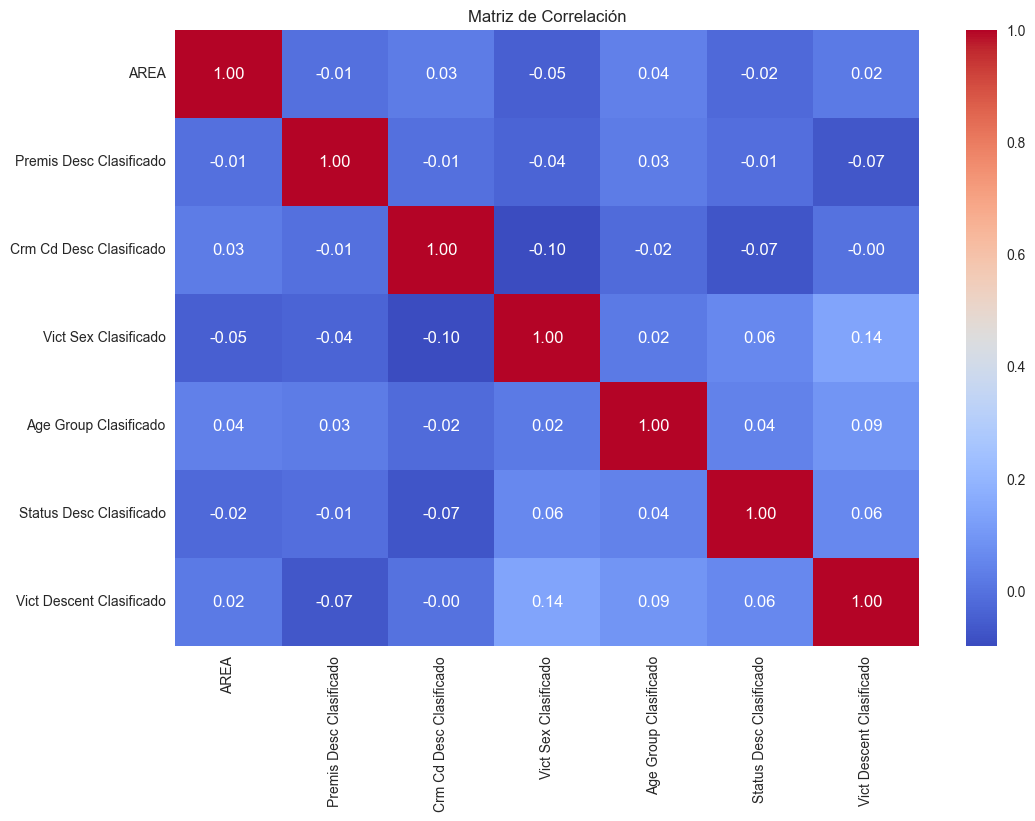

In [56]:
# Matriz de correlación
corr_matrix = dataenco.corr()

#sale error ya que tenemos valores no numericos
# Visualización de la matriz
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


In [57]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import pandas as pd

# # Separar características (X) y etiqueta (y)
# target = 'Crm Cd Desc Clasificado'
# features = [col for col in data.columns if col != target]
# # Eliminar filas con valores nulos en las columnas seleccionadas
# data = data.dropna(subset=features + [target])

# X = data[features]
# y = data[target]


# # Identificar columnas categóricas y numéricas
# categorical_columns = X.select_dtypes(include=['object', 'category']).columns
# numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# # Codificar las columnas categóricas
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', 'passthrough', numerical_columns),
#         ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_columns)
#     ]
# )

# # Dividir en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# # Aplicar preprocesamiento
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)  # Sin error porque handle_unknown='ignore'

# # Escalar las características para normalizar los valores numéricos
# scaler = StandardScaler(with_mean=False)  # No centrar matrices dispersas
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Crear el modelo de regresión logística
# model = LogisticRegression(max_iter=500, random_state=42)
# model.fit(X_train, y_train)

# # Predicciones
# y_pred = model.predict(X_test)

# # Evaluación del modelo
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# print("\nAccuracy Score:")
# print(accuracy_score(y_test, y_pred))


In [58]:
# # Crear el modelo de árbol de decisión
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Predicciones
# y_pred = model.predict(X_test)

# # Evaluación del modelo
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# print("\nAccuracy Score:")
# print(accuracy_score(y_test, y_pred))

In [59]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Status', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON',
       'Premis Desc Clasificado', 'Crm Cd Desc Clasificado',
       'Vict Sex Clasificado', 'Age Group', 'Age Group Clasificado',
       'Status Desc Clasificado', 'Vict Descent Clasificado'],
      dtype='object')

In [60]:
dictdecendencia ={
'H':     'Hispano/Latino',                                             
'W':     'Blanco',                                                        
'B':     'Negro/Afroamericano',                                           
'O':     'Otro',                                                          
'A':     'Asiático',                                                      
'X':     'Desconocido',                                                   
'K':     'Coreano',                                                       
'C':     'Chino',                                                         
'F':     'Filipino',                                                      
'J':     'Japonés',                                                       
'V':     'Vietnamita',                                                    
'I':     'Indio Americano/Alaska Nativa',                                 
'Z':     'Polinesio',                                                     
'P':     'Guamaniano',                                                    
'U':     'Hawaiano',                                                      
'D':     'Camboyano',                                                     
'L':     'Laosiano',                                                      
'G':     'Otro Asiático',                                                 
'S':     'Samoano',                                                       
'-':     'No especificado'
}         

 # Reemplazar los valores de la columna usando el diccionario
data['Vict Descent Clasificado_contex'] = data['Vict Descent Clasificado'].replace(dictdecendencia)

# Verificar los cambios
print(data[['Vict Descent Clasificado', 'Vict Descent Clasificado_contex']].head())


  Vict Descent Clasificado Vict Descent Clasificado_contex
1                        O                            Otro
2                        X                     Desconocido
3                        O                            Otro
4                        H                  Hispano/Latino
5                        H                  Hispano/Latino


In [61]:
dictdecendencia ={
'M':     'Masculino',                                             
'F':     'Femenino',                                                        
'X':     'Desconocido o Indeterminado',                                           

}         

 # Reemplazar los valores de la columna usando el diccionario
data['Vict Sex Clasificado_contex'] = data['Vict Sex Clasificado'].replace(dictdecendencia)

# Verificar los cambios
print(data[['Vict Sex Clasificado', 'Vict Sex Clasificado_contex']].head())

  Vict Sex Clasificado  Vict Sex Clasificado_contex
1                    M                    Masculino
2                    X  Desconocido o Indeterminado
3                    M                    Masculino
4                    M                    Masculino
5                    M                    Masculino


In [62]:
data['Vict Sex Clasificado'].value_counts()

Vict Sex Clasificado
M    330458
F    316266
X     10135
Name: count, dtype: int64

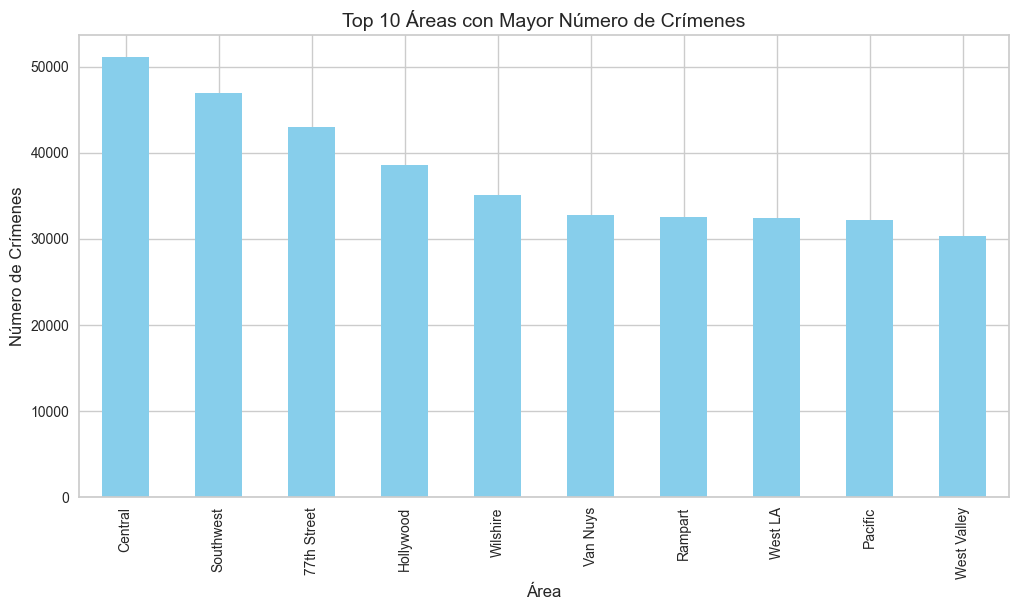

C:\Users\thewo\AppData\Local\Temp\ipykernel_3296\2601150862.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




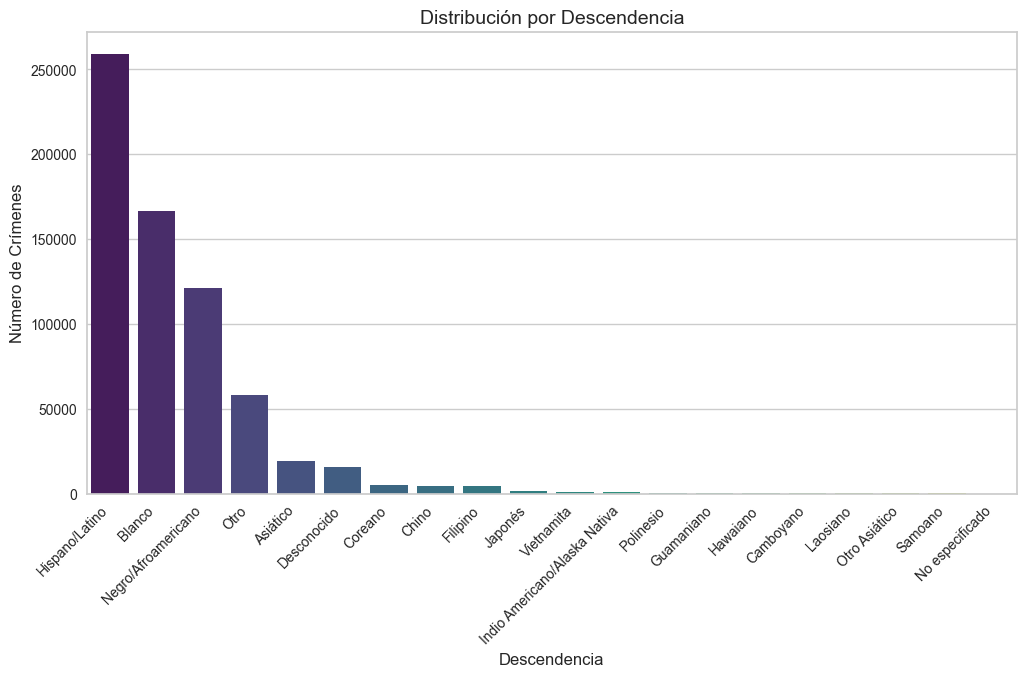

C:\Users\thewo\AppData\Local\Temp\ipykernel_3296\2601150862.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




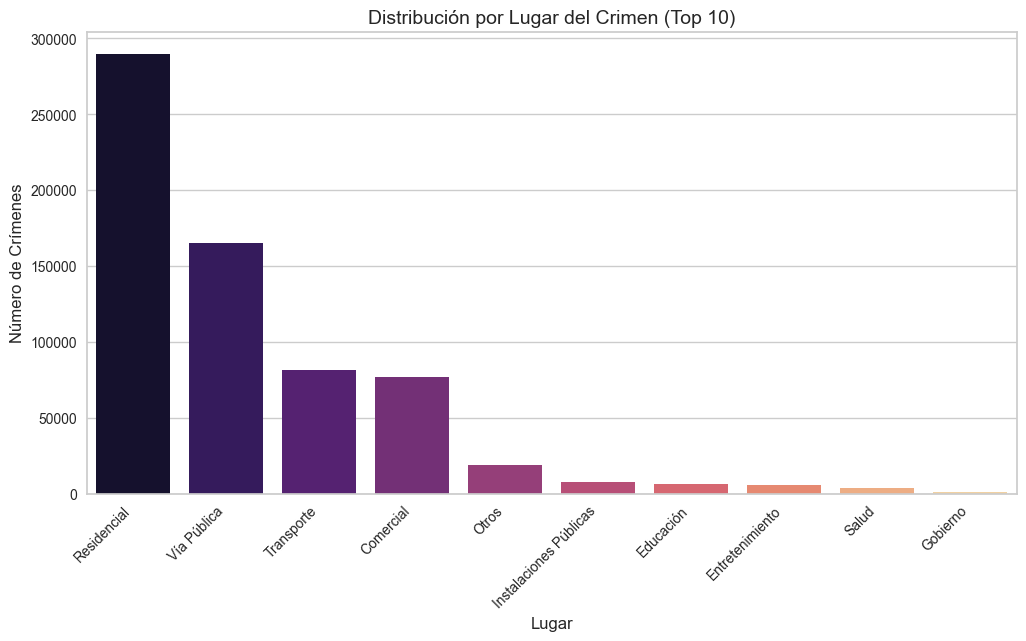

C:\Users\thewo\AppData\Local\Temp\ipykernel_3296\2601150862.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




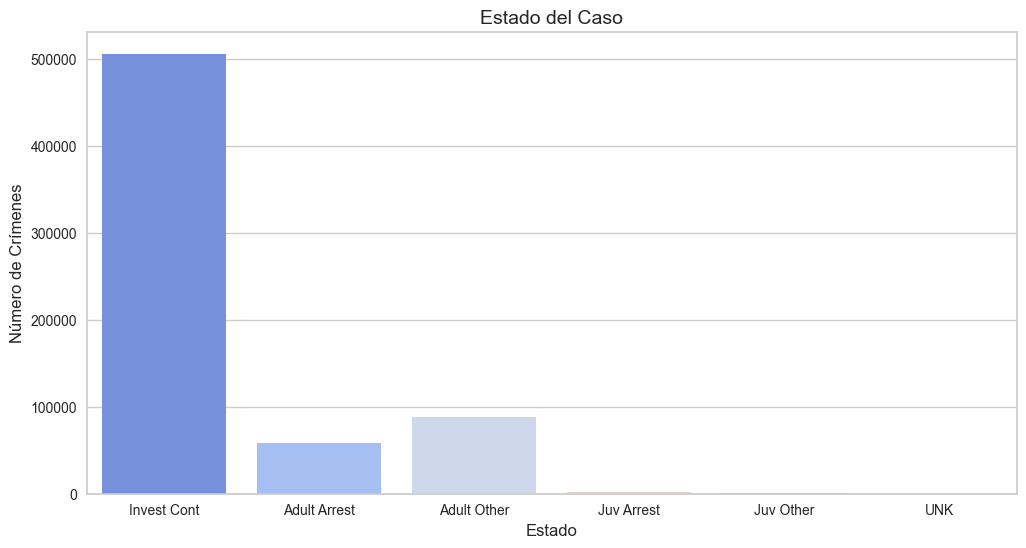

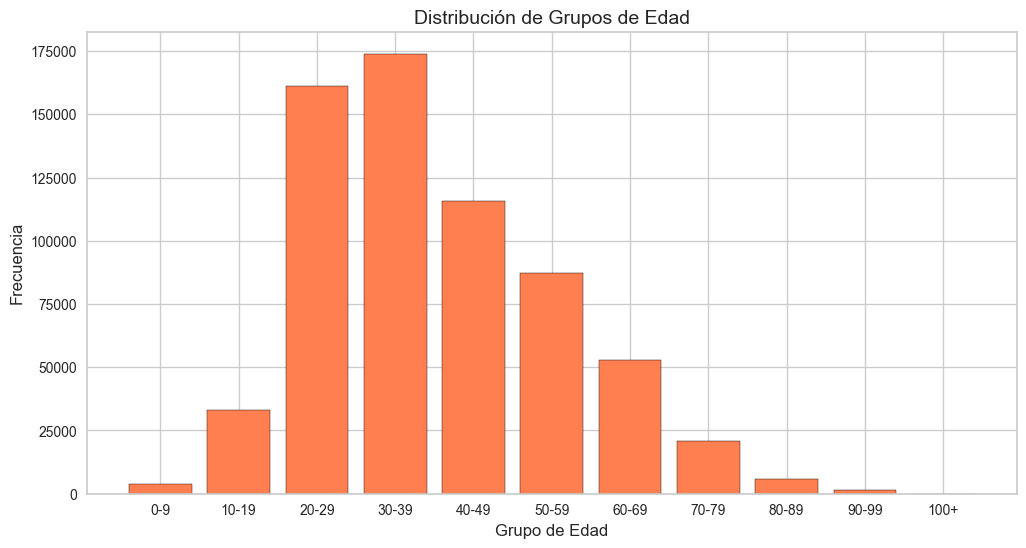

C:\Users\thewo\AppData\Local\Temp\ipykernel_3296\2601150862.py:54: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




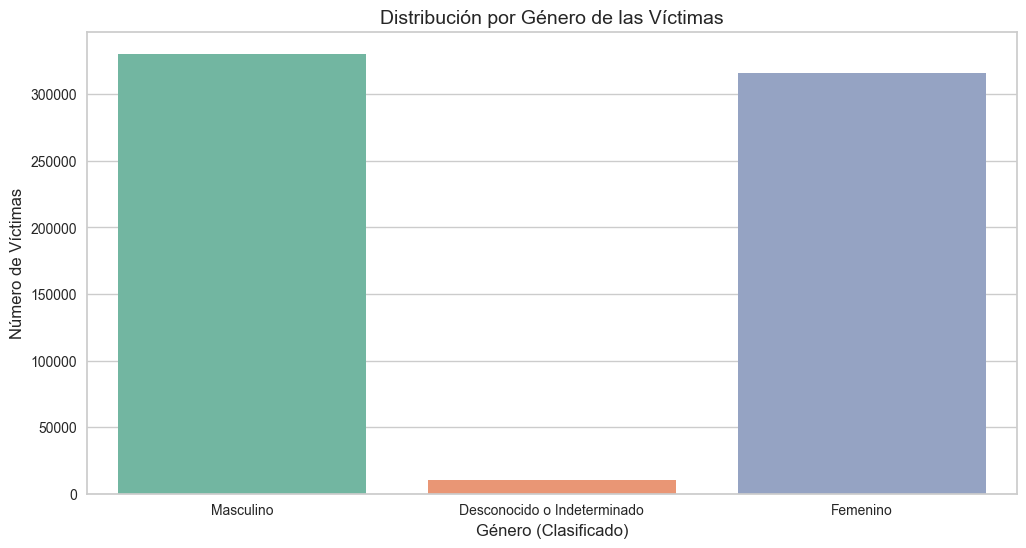

In [63]:

# --- Distribución Geográfica de Crímenes ---
plt.figure(figsize=(12, 6))
data['AREA NAME'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Áreas con Mayor Número de Crímenes', fontsize=14)
plt.xlabel('Área', fontsize=12)
plt.ylabel('Número de Crímenes', fontsize=12)
# plt.xticks(rotation=45, ha='right')
plt.show()

# --- Análisis Demográfico ---
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Vict Descent Clasificado_contex',
              order=data['Vict Descent Clasificado_contex'].value_counts().index, palette='viridis')
plt.title('Distribución por Descendencia', fontsize=14)
plt.xlabel('Descendencia', fontsize=12)
plt.ylabel('Número de Crímenes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# --- Análisis por Lugar ---
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Premis Desc Clasificado',
              order=data['Premis Desc Clasificado'].value_counts().head(10).index, palette='magma')
plt.title('Distribución por Lugar del Crimen (Top 10)', fontsize=14)
plt.xlabel('Lugar', fontsize=12)
plt.ylabel('Número de Crímenes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# --- Estado del Caso ---
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Status Desc Clasificado', palette='coolwarm')
plt.title('Estado del Caso', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Número de Crímenes', fontsize=12)
# plt.xticks(rotation=45, ha='right')
plt.show()

# --- Por Edad ---
# Contar la frecuencia de cada grupo de edad
age_group_counts = data['Age Group Clasificado'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(age_group_counts.index, age_group_counts.values, color='coral', edgecolor='black')
plt.title('Distribución de Grupos de Edad', fontsize=14)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(age_group_counts.index, rotation=0)  # Opcional: ajustar etiquetas
plt.show()


# --- Por Género ---
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Vict Sex Clasificado_contex', palette='Set2')
plt.title('Distribución por Género de las Víctimas', fontsize=14)
plt.xlabel('Género (Clasificado)', fontsize=12)
plt.ylabel('Número de Víctimas', fontsize=12)
plt.show()

In [64]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Status', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'LAT', 'LON',
       'Premis Desc Clasificado', 'Crm Cd Desc Clasificado',
       'Vict Sex Clasificado', 'Age Group', 'Age Group Clasificado',
       'Status Desc Clasificado', 'Vict Descent Clasificado',
       'Vict Descent Clasificado_contex', 'Vict Sex Clasificado_contex'],
      dtype='object')

In [65]:
# Paleta de colores
primary_color = '#BF2C53'  # Rojo oscuro
secondary_color = '#F2C53D'  # Amarillo dorado
line_color = '#027373'  # Verde azulado

# Configuración del estilo
plt.style.use('default')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


C:\Users\thewo\AppData\Local\Temp\ipykernel_3296\2014579521.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\thewo\AppData\Local\Temp\ipykernel_3296\2014579521.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\thewo\AppData\Local\Temp\ipykernel_3296\2014579521.py:27: UserWarning:

The palette list has more values (14) than needed (7), which may not be intended.



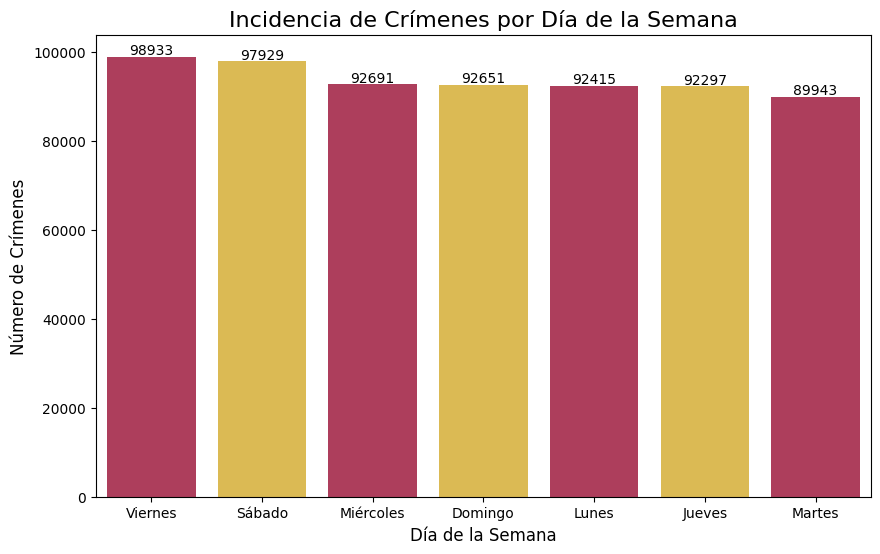

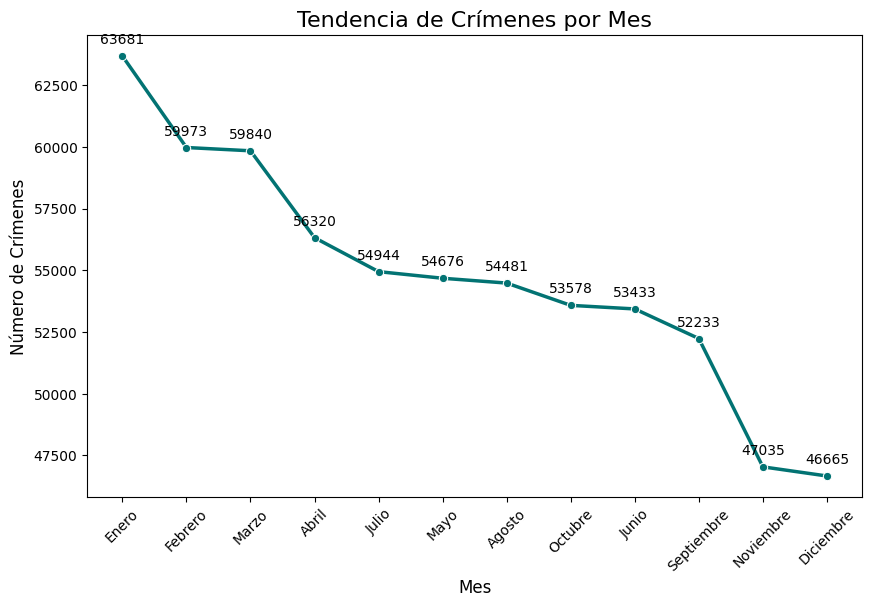

In [66]:
# Conversión de fechas
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

# Mapeo de días y meses al español
days_translation = {
    "Monday": "Lunes", "Tuesday": "Martes", "Wednesday": "Miércoles", 
    "Thursday": "Jueves", "Friday": "Viernes", "Saturday": "Sábado", "Sunday": "Domingo"
}
months_translation = {
    "January": "Enero", "February": "Febrero", "March": "Marzo", "April": "Abril", 
    "May": "Mayo", "June": "Junio", "July": "Julio", "August": "Agosto", 
    "September": "Septiembre", "October": "Octubre", "November": "Noviembre", "December": "Diciembre"
}

# Extraer día de la semana y mes, traducidos al español
data['Day of Week'] = data['DATE OCC'].dt.day_name().map(days_translation)
data['Month'] = data['DATE OCC'].dt.month_name().map(months_translation)

# Agrupar por día de la semana
day_group = data.groupby('Day of Week')['Crm Cd Desc Clasificado'].count().sort_values(ascending=False)

# Agrupar por mes
month_group = data.groupby('Month')['Crm Cd Desc Clasificado'].count().sort_values(ascending=False)

# Gráfico de barras - Días de la semana
plt.figure(figsize=(10, 6))
sns.barplot(x=day_group.index, y=day_group.values, palette=[primary_color, secondary_color] * len(day_group))
plt.title('Incidencia de Crímenes por Día de la Semana', fontsize=16, color='black')
plt.xlabel('Día de la Semana', fontsize=12, color='black')
plt.ylabel('Número de Crímenes', fontsize=12, color='black')

# Agregar los números encima de cada barra
for index, value in enumerate(day_group.values):
    plt.text(index, value + 500, str(value), ha='center', fontsize=10, color='black')

plt.show()

# Gráfico de líneas - Tendencia mensual
plt.figure(figsize=(10, 6))
sns.lineplot(x=month_group.index, y=month_group.values, marker='o', color=line_color, linewidth=2.5)
plt.title('Tendencia de Crímenes por Mes', fontsize=16, color='black')
plt.xlabel('Mes', fontsize=12, color='black')
plt.ylabel('Número de Crímenes', fontsize=12, color='black')
plt.xticks(rotation=45)

# Agregar los números encima de cada punto
for x, y in zip(month_group.index, month_group.values):
    plt.text(x, y + 500, str(y), ha='center', fontsize=10, color='black')

plt.show()



C:\Users\thewo\AppData\Local\Temp\ipykernel_3296\2598974613.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\thewo\AppData\Local\Temp\ipykernel_3296\2598974613.py:6: UserWarning:

The palette list has more values (14) than needed (7), which may not be intended.



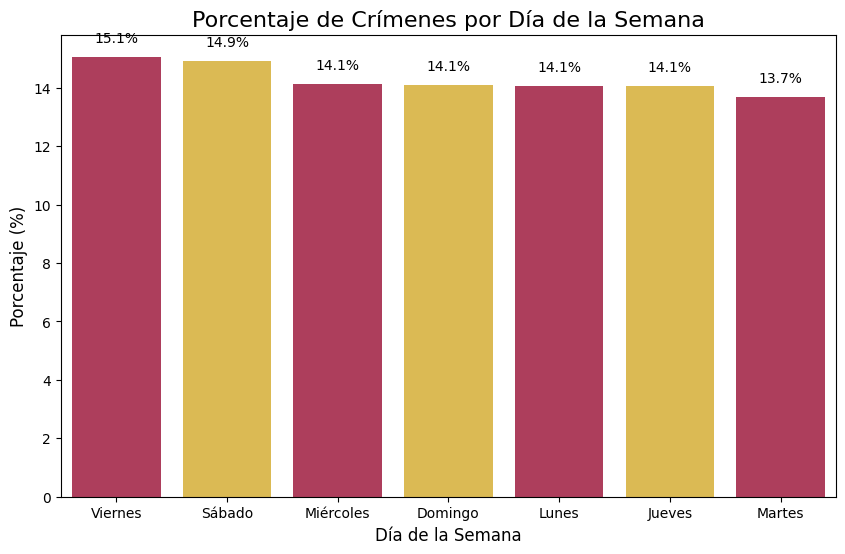

C:\Users\thewo\AppData\Local\Temp\ipykernel_3296\2598974613.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




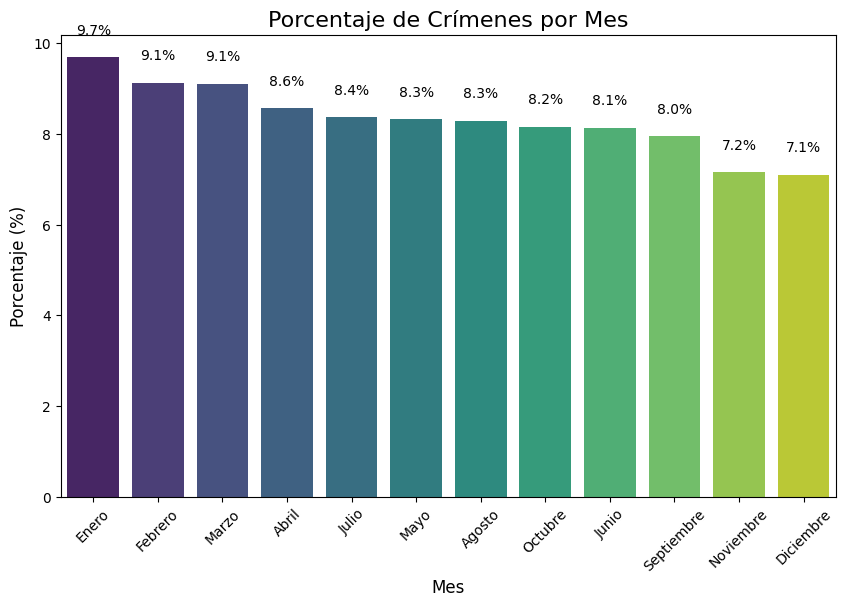

In [67]:
# Calcular los porcentajes para días de la semana
day_group_percent = (day_group / day_group.sum()) * 100

# Gráfico de barras - Porcentaje por Día de la Semana
plt.figure(figsize=(10, 6))
sns.barplot(x=day_group_percent.index, y=day_group_percent.values, palette=[primary_color, secondary_color] * len(day_group))
plt.title('Porcentaje de Crímenes por Día de la Semana', fontsize=16, color='black')
plt.xlabel('Día de la Semana', fontsize=12, color='black')
plt.ylabel('Porcentaje (%)', fontsize=12, color='black')

# Agregar los valores porcentuales encima de cada barra
for index, value in enumerate(day_group_percent.values):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', fontsize=10, color='black')

plt.show()

# Calcular los porcentajes para los meses
month_group_percent = (month_group / month_group.sum()) * 100

# Gráfico de barras - Porcentaje por Mes
plt.figure(figsize=(10, 6))
sns.barplot(x=month_group_percent.index, y=month_group_percent.values, palette=sns.color_palette('viridis', len(month_group)))
plt.title('Porcentaje de Crímenes por Mes', fontsize=16, color='black')
plt.xlabel('Mes', fontsize=12, color='black')
plt.ylabel('Porcentaje (%)', fontsize=12, color='black')

# Agregar los valores porcentuales encima de cada barra
for index, value in enumerate(month_group_percent.values):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.show()




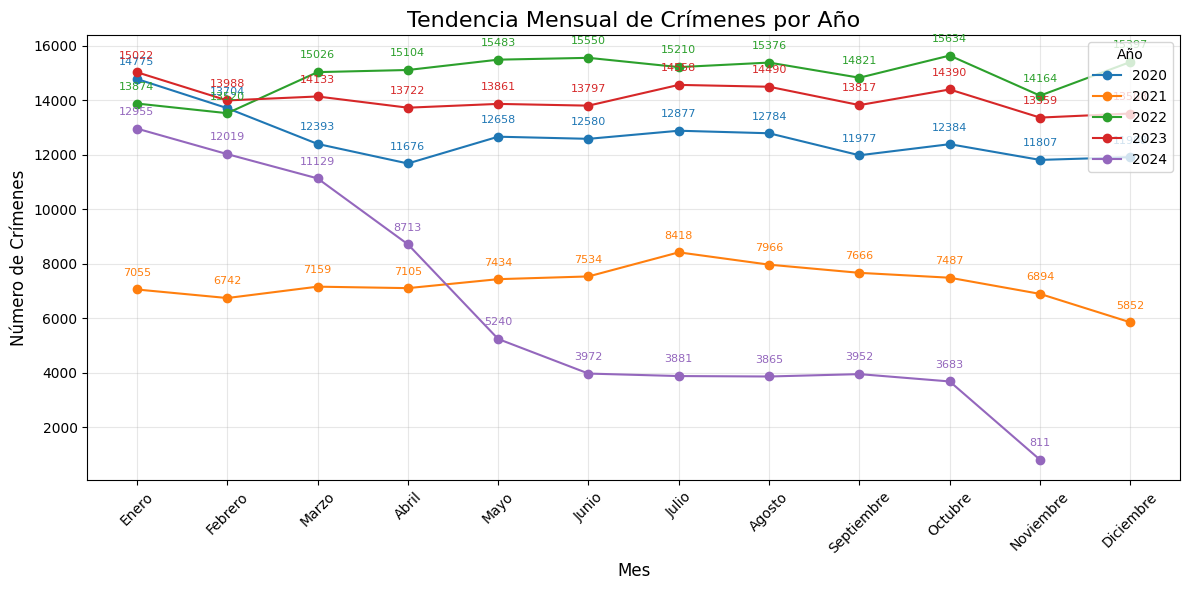

In [68]:
# Crear una columna de año
data['Year'] = data['DATE OCC'].dt.year

# Traducir nombres de meses al español
month_translation = {
    'January': 'Enero', 'February': 'Febrero', 'March': 'Marzo', 'April': 'Abril', 'May': 'Mayo', 'June': 'Junio',
    'July': 'Julio', 'August': 'Agosto', 'September': 'Septiembre', 'October': 'Octubre',
    'November': 'Noviembre', 'December': 'Diciembre'
}

data['Month'] = data['DATE OCC'].dt.month_name().map(month_translation)

# Agrupar por año y mes
monthly_trends = data.groupby([data['Year'], data['Month']])['Crm Cd Desc Clasificado'].count().reset_index()

# Ordenar los meses en español
monthly_trends['Month'] = pd.Categorical(
    monthly_trends['Month'],
    categories=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    ordered=True
)

# Pivotear para usar en el gráfico de líneas
monthly_trends_pivot = monthly_trends.pivot(index='Month', columns='Year', values='Crm Cd Desc Clasificado')

# Gráfico de líneas
plt.figure(figsize=(12, 6))
colors = sns.color_palette("tab10", len(monthly_trends_pivot.columns))

for year, color in zip(monthly_trends_pivot.columns, colors):
    plt.plot(monthly_trends_pivot.index, monthly_trends_pivot[year], marker='o', label=str(year), color=color)

plt.title('Tendencia Mensual de Crímenes por Año', fontsize=16, color='black')
plt.xlabel('Mes', fontsize=12, color='black')
plt.ylabel('Número de Crímenes', fontsize=12, color='black')
plt.xticks(rotation=45)
plt.legend(title='Año', loc='upper right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar los valores sobre cada punto
for i, year in enumerate(monthly_trends_pivot.columns):
    for x, y in zip(monthly_trends_pivot.index, monthly_trends_pivot[year]):
        if not pd.isna(y):
            plt.text(x, y + 500, f'{int(y)}', ha='center', fontsize=8, color=colors[i])

plt.show()



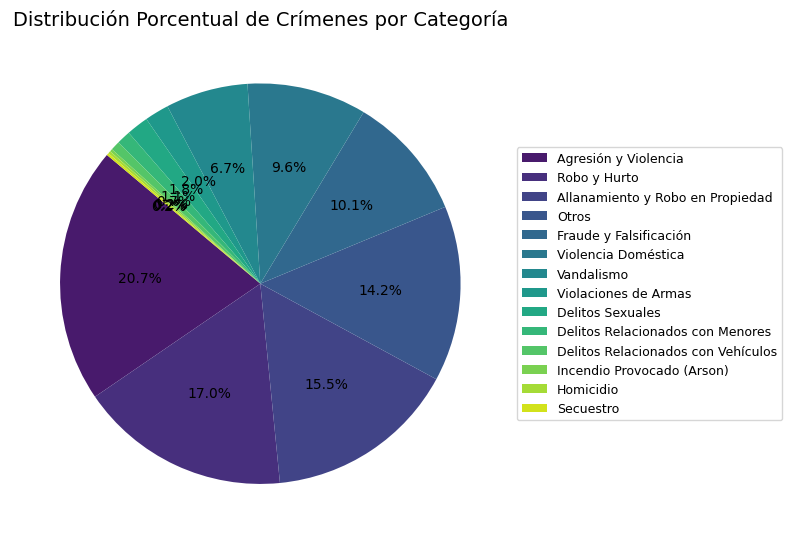

In [69]:
# Calcular la frecuencia de crímenes por categoría
crime_frequency = data['Crm Cd Desc Clasificado'].value_counts()

# Calcular el porcentaje de cada categoría
crime_percent = (crime_frequency / crime_frequency.sum()) * 100

# Configuración del tamaño de la figura
plt.figure(figsize=(8, 8))

# Crear el gráfico de pastel con una paleta de colores adecuada
patches, texts, autotexts = plt.pie(
    crime_percent,  # Datos de porcentaje de crímenes
    startangle=140,  # Ángulo inicial para el gráfico
    colors=sns.color_palette('viridis', len(crime_frequency)),  # Paleta de colores para las categorías
    autopct='%1.1f%%'  # Mostrar porcentajes con 1 decimal
)

# Título del gráfico
plt.title('Distribución Porcentual de Crímenes por Categoría', fontsize=14, color='black')

# Añadir una leyenda fuera del gráfico para facilitar la lectura
plt.legend(
    patches,  # Elementos del gráfico
    crime_frequency.index,  # Nombres de las categorías
    loc='center left',  # Posición de la leyenda
    bbox_to_anchor=(1, 0.5),  # Ubicación fuera del gráfico
    fontsize=9  # Tamaño de la fuente de la leyenda
)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()



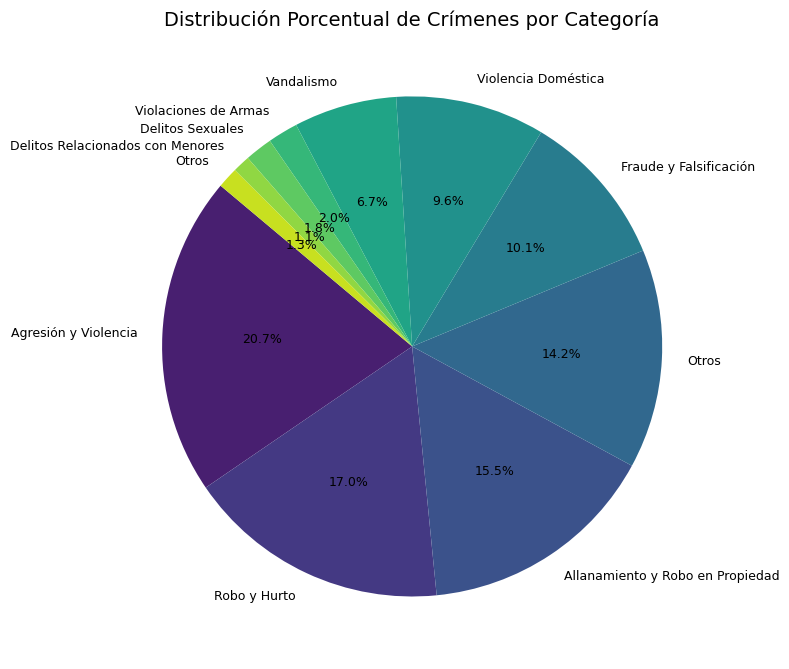

In [70]:
# Establecer un umbral para agrupar categorías
threshold = 1  # Por ejemplo, agrupar categorías con menos del 1%

# Crear un DataFrame temporal
crime_data = pd.DataFrame({
    'Categoría': crime_frequency.index,
    'Frecuencia': crime_frequency.values,
    'Porcentaje': crime_percent.values
})

# Separar categorías principales y otras
main_categories = crime_data[crime_data['Porcentaje'] >= threshold]
other_categories = crime_data[crime_data['Porcentaje'] < threshold]

# Sumar las categorías "Otros"
others = pd.DataFrame({
    'Categoría': ['Otros'],
    'Frecuencia': [other_categories['Frecuencia'].sum()],
    'Porcentaje': [other_categories['Porcentaje'].sum()]
})

# Combinar categorías principales con "Otros"
crime_data_final = pd.concat([main_categories, others], ignore_index=True)

# Gráfico de pastel con categorías agrupadas
plt.figure(figsize=(8, 8))

patches, texts, autotexts = plt.pie(
    crime_data_final['Porcentaje'],
    labels=crime_data_final['Categoría'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(crime_data_final))
)

plt.title('Distribución Porcentual de Crímenes por Categoría', fontsize=14)

# Ajustar tamaño de fuente
for text in texts + autotexts:
    text.set_fontsize(9)

plt.tight_layout()

plt.show()


C:\Users\thewo\AppData\Local\Temp\ipykernel_3296\1511299163.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\thewo\AppData\Local\Temp\ipykernel_3296\1511299163.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



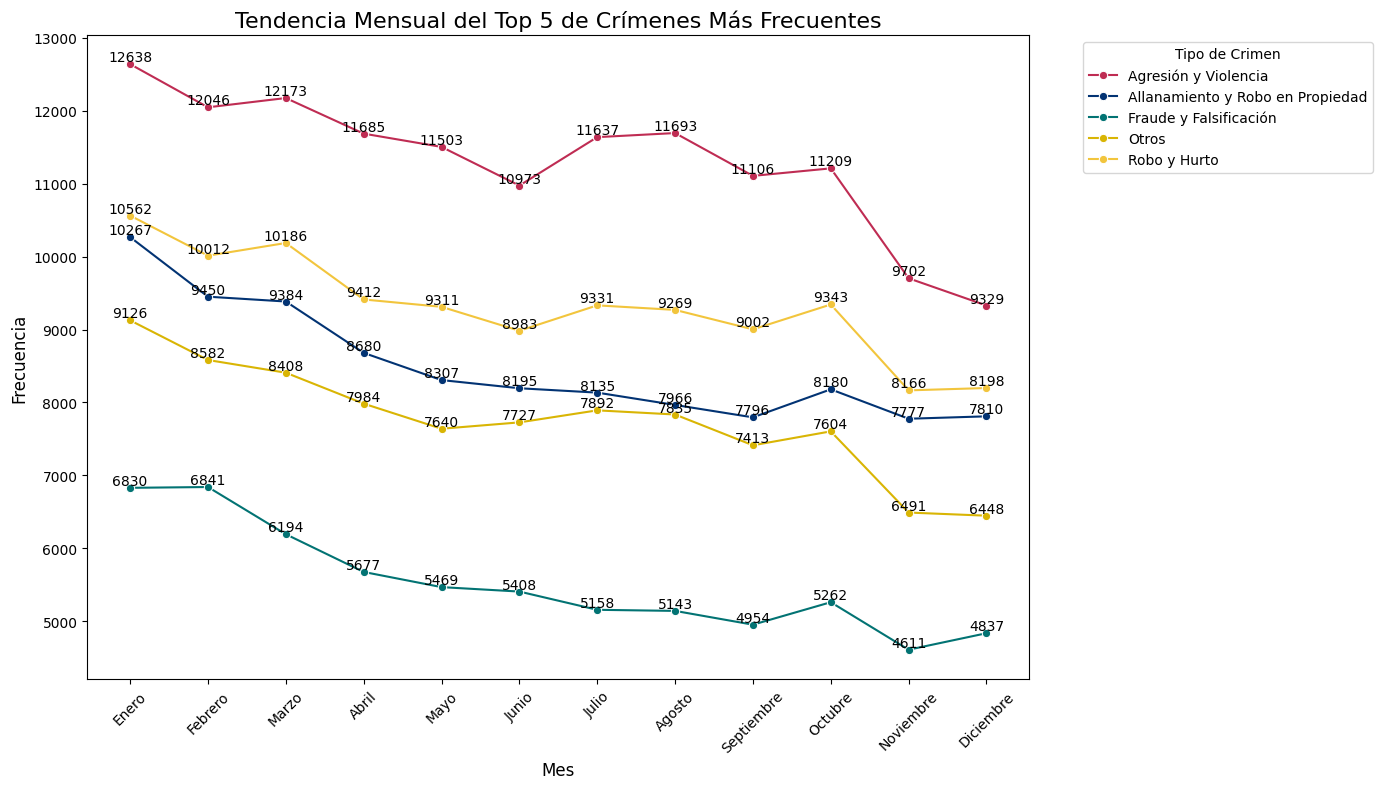

In [ ]:
# Extraer el mes de la columna 'DATE OCC'
data['Month'] = data['DATE OCC'].dt.month_name()

# Agrupar por mes y tipo de crimen, y contar las frecuencias
crime_monthly = data.groupby(['Month', 'Crm Cd Desc Clasificado']).size().reset_index(name='Frequency')

# Seleccionar el top 5 crímenes más frecuentes a nivel global
top_5_crimes = crime_monthly.groupby('Crm Cd Desc Clasificado')['Frequency'].sum().nlargest(5).index

# Filtrar los datos para incluir solo el top 5 crímenes
filtered_data = crime_monthly[crime_monthly['Crm Cd Desc Clasificado'].isin(top_5_crimes)]

# Diccionario para traducir los nombres de los meses
month_translation = {
    "January": "Enero", "February": "Febrero", "March": "Marzo", "April": "Abril",
    "May": "Mayo", "June": "Junio", "July": "Julio", "August": "Agosto",
    "September": "Septiembre", "October": "Octubre", "November": "Noviembre", "December": "Diciembre"
}

# Aplicar traducción a la columna 'Month' en el dataframe
filtered_data['Month'] = filtered_data['Month'].map(month_translation)

# Ordenar los meses traducidos cronológicamente
filtered_data['Month'] = pd.Categorical(
    filtered_data['Month'], 
    categories=[
        "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
        "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
    ], 
    ordered=True
)

# Definir los colores para las líneas del gráfico
colors = ["#BF2C53", "#023373", "#027373", "#D9B504", "#F2C53D"]

# Crear el gráfico de líneas
plt.figure(figsize=(14, 8))
lineplot = sns.lineplot(
    x='Month', 
    y='Frequency', 
    hue='Crm Cd Desc Clasificado', 
    data=filtered_data, 
    marker='o', 
    palette=colors  # Usamos los colores definidos
)

# Títulos y etiquetas
plt.title('Tendencia Mensual del Top 5 de Crímenes Más Frecuentes', fontsize=16, color='black')
plt.xlabel('Mes', fontsize=12, color='black')
plt.ylabel('Frecuencia', fontsize=12, color='black')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Crimen', bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar etiquetas de valores en los puntos
for line in lineplot.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y, f'{int(y)}', color='black', fontsize=10, ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()
plt.show()